# Ordering by metrics and retraining phase

## Dataset: Intel

## Configuration 1

## 1)	Incremental guided retraining starting from scratch.

Steps:
- Model: Train a new model with 5000 random inputs
    - Add 5000 inputs with the higher score
    - New model: (Train with previous training set + 5000 inputs) -> (Train only with new inputs)
    - Repeat until last inputs


In [1]:
import argparse

import numpy as np
import tensorflow as tf
import keras.backend as K

import matplotlib.pyplot as plt

from keras.datasets import mnist, cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2

import glob
import os
import cv2
import keras


import time
import argparse

from tqdm import tqdm
from keras.models import load_model, Model


In [2]:
pip install pipreqs

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=16f35067bd396bc12869ac44eeb50a887e1c207cbe80f7593a8aa3aefbfcf490
  Stored in directory: c:\users\fjdur\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt
Note: you may need to restart the kernel to use updated packages.


In [9]:
tf.__version__

'2.5.0'

In [4]:
keras.__version__

'2.5.0'

In [ ]:
cd '../utils/'

In [3]:
# utils for project
import utils_guided_retraining as utils

In [ ]:
cd '../notebooks/'

In [4]:
from importlib import reload  
utils = reload(utils)

In [5]:
x_train,y_train = utils.get_data("intel","Train")
x_val,y_val = utils.get_data("intel","Val")
x_test,y_test = utils.get_data("intel","Test")

In [6]:
x_train_and_adversary,y_train_and_adversary = utils.get_data("intel","Train_and_adversary")

In [7]:
x_adversary_training = x_train_and_adversary[len(x_train):]
print(len(x_adversary_training))
y_adversary_training = y_train_and_adversary[len(y_train):]

print(len(y_adversary_training))

3000
3000


In [8]:
# Obtaining adversarial examples for testing 
x_test_and_adversary,y_test_and_adversary = utils.get_adversarial_data("intel",'Test_fgsm') 

In [9]:
x_adversary_test_fgsm = x_test_and_adversary[len(x_test):]
print(len(x_adversary_test_fgsm))
y_adversary_test_fgsm = y_test_and_adversary[len(y_test):]

print(len(y_adversary_test_fgsm))

3000
3000


## Loading values and models

In [12]:
save_dir_lsa = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/intel_lsa_values_2.npy"


save_dir_dsa = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/intel_dsa_values_2.npy"

target_lsa = np.load(save_dir_lsa)
target_dsa = np.load(save_dir_dsa)

In [11]:
print("jkds")

jkds


In [25]:

model_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/models/intel_model_21_10/"

model_original = utils.My_model("intel",True, model_dir)


Model loaded correctly


In [ ]:
model_original2.model.summary()

In [ ]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [16]:
lsa_values = target_lsa
dsa_values = target_dsa

In [17]:

# Obtaining top n images by LSA values
top_images_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),x_train_and_adversary)
top_labels_by_lsa = utils.get_x_of_indexes(list(np.flip(np.argsort(lsa_values))),y_train_and_adversary)

top_images_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),x_train_and_adversary)
top_labels_by_dsa = utils.get_x_of_indexes(list(np.flip(np.argsort(dsa_values))),y_train_and_adversary)


## LSA

In [19]:
m = 700
n = 0
image_sets_lsa = []
label_sets_lsa = []


for i in range(len(top_images_by_lsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_lsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_lsa)%m))
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m+(len(top_images_by_lsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_lsa_n = np.array(top_images_by_lsa[:n+m])
        top_labels_by_lsa_n = np.array(top_labels_by_lsa[:n+m])
    image_sets_lsa.append(top_images_by_lsa_n)
    label_sets_lsa.append(top_labels_by_lsa_n)
    print(len(top_images_by_lsa_n))
    n += m



0 :
0  ->  700
700
1 :
0  ->  1400
1400
2 :
0  ->  2100
2100
3 :
0  ->  2800
2800
4 :
0  ->  3500
3500
5 :
0  ->  4200
4200
6 :
0  ->  4900
4900
7 :
0  ->  5600
5600
8 :
0  ->  6300
6300
9 :
0  ->  7000
7000
10 :
0  ->  7700
7700
11 :
0  ->  8400
8400
12 :
0  ->  9100
9100
13 :
0  ->  9800
9800
14 :
0  ->  10500
10500
15 :
0  ->  11200
11200
16 :
0  ->  11900
11900
17 :
0  ->  12600
12600
18 :
0  ->  13300
13300
19 :
Last
0  ->  14224
14224


In [26]:


models_lsa = []
for i in range(len(label_sets_lsa)):
    print(i,":")
    model = utils.My_model('intel',False)
    model.compile_model()
    #model.model.build()
    #print(model.model.summary())
    models_lsa.append(model)

0 :
Model compiled
1 :
Model compiled
2 :
Model compiled
3 :
Model compiled
4 :
Model compiled
5 :
Model compiled
6 :
Model compiled
7 :
Model compiled
8 :
Model compiled
9 :
Model compiled
10 :
Model compiled
11 :
Model compiled
12 :
Model compiled
13 :
Model compiled
14 :
Model compiled
15 :
Model compiled
16 :
Model compiled
17 :
Model compiled
18 :
Model compiled
19 :
Model compiled


In [27]:
n=0
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
6/6 [==============================] - 5s 673ms/step - loss: 1.7938 - accuracy: 0.1726 - val_loss: 1.7913 - val_accuracy: 0.1562
Epoch 2/20
6/6 [==============================] - 3s 584ms/step - loss: 1.7888 - accuracy: 0.1718 - val_loss: 1.7887 - val_accuracy: 0.1569
Epoch 3/20
6/6 [==============================] - 3s 600ms/step - loss: 1.7786 - accuracy: 0.1685 - val_loss: 1.7864 - val_accuracy: 0.1626
Epoch 4/20
6/6 [==============================] - 3s 576ms/step - loss: 1.7737 - accuracy: 0.2024 - val_loss: 1.7802 - val_accuracy: 0.2942
Epoch 5/20
6/6 [==============================] - 3s 566ms/step - loss: 1.7543 - accuracy: 0.2097 - val_loss: 1.7750 - val_accuracy: 0.2325
Epoch 6/20
6/6 [==============================] - 3s 580ms/step - loss: 1.7295 - accuracy: 0.2946 - val_loss: 1.7069 - val_accuracy: 0.2753
Epoch 7/20
6/6 [==============================] - 3s 557ms/step - loss: 1.6637 - accuracy: 0.2849 - val_loss: 1.6428 - val_accuracy: 0.2775
Epoch 8/20
6/6 [==

In [28]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
11/11 [==============================] - 6s 458ms/step - loss: 1.8108 - accuracy: 0.2333 - val_loss: 1.7845 - val_accuracy: 0.1633
Epoch 2/20
11/11 [==============================] - 4s 416ms/step - loss: 1.7355 - accuracy: 0.2569 - val_loss: 1.7499 - val_accuracy: 0.1701
Epoch 3/20
11/11 [==============================] - 4s 420ms/step - loss: 1.6713 - accuracy: 0.2705 - val_loss: 1.6997 - val_accuracy: 0.1698
Epoch 4/20
11/11 [==============================] - 4s 423ms/step - loss: 1.6931 - accuracy: 0.2919 - val_loss: 1.6694 - val_accuracy: 0.1854
Epoch 5/20
11/11 [==============================] - 4s 419ms/step - loss: 1.6477 - accuracy: 0.2942 - val_loss: 1.5507 - val_accuracy: 0.3570
Epoch 6/20
11/11 [==============================] - 5s 426ms/step - loss: 1.4896 - accuracy: 0.3943 - val_loss: 1.3505 - val_accuracy: 0.4497
Epoch 7/20
11/11 [==============================] - 5s 429ms/step - loss: 1.4239 - accuracy: 0.4409 - val_loss: 1.3298 - val_accuracy: 0.4444
Epoc

In [29]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
17/17 [==============================] - 8s 382ms/step - loss: 1.7748 - accuracy: 0.2463 - val_loss: 1.9578 - val_accuracy: 0.1562
Epoch 2/20
17/17 [==============================] - 6s 353ms/step - loss: 1.6824 - accuracy: 0.3208 - val_loss: 1.8167 - val_accuracy: 0.1562
Epoch 3/20
17/17 [==============================] - 6s 353ms/step - loss: 1.6666 - accuracy: 0.3241 - val_loss: 1.7636 - val_accuracy: 0.1566
Epoch 4/20
17/17 [==============================] - 6s 358ms/step - loss: 1.5819 - accuracy: 0.3376 - val_loss: 1.5298 - val_accuracy: 0.2479
Epoch 5/20
17/17 [==============================] - 6s 356ms/step - loss: 1.5243 - accuracy: 0.3617 - val_loss: 1.4387 - val_accuracy: 0.3363
Epoch 6/20
17/17 [==============================] - 6s 358ms/step - loss: 1.4449 - accuracy: 0.4084 - val_loss: 1.4178 - val_accuracy: 0.3930
Epoch 7/20
17/17 [==============================] - 6s 356ms/step - loss: 1.3916 - accuracy: 0.4489 - val_loss: 1.3591 - val_accuracy: 0.4672
Epoc

In [30]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
22/22 [==============================] - 9s 355ms/step - loss: 1.6392 - accuracy: 0.3747 - val_loss: 1.8369 - val_accuracy: 0.1562
Epoch 2/20
22/22 [==============================] - 7s 339ms/step - loss: 1.4888 - accuracy: 0.4715 - val_loss: 1.8470 - val_accuracy: 0.1562
Epoch 3/20
22/22 [==============================] - 7s 340ms/step - loss: 1.4551 - accuracy: 0.4738 - val_loss: 1.8235 - val_accuracy: 0.1612
Epoch 4/20
22/22 [==============================] - 7s 342ms/step - loss: 1.3587 - accuracy: 0.4857 - val_loss: 1.6919 - val_accuracy: 0.1819
Epoch 5/20
22/22 [==============================] - 7s 339ms/step - loss: 1.3167 - accuracy: 0.5027 - val_loss: 1.5902 - val_accuracy: 0.3003
Epoch 6/20
22/22 [==============================] - 7s 343ms/step - loss: 1.2456 - accuracy: 0.5324 - val_loss: 1.5130 - val_accuracy: 0.3178
Epoch 7/20
22/22 [==============================] - 7s 339ms/step - loss: 1.2036 - accuracy: 0.5349 - val_loss: 1.2780 - val_accuracy: 0.5228
Epoc

In [31]:
print(n) #4

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
28/28 [==============================] - 11s 336ms/step - loss: 1.5525 - accuracy: 0.4396 - val_loss: 1.8246 - val_accuracy: 0.1562
Epoch 2/20
28/28 [==============================] - 9s 316ms/step - loss: 1.4499 - accuracy: 0.5311 - val_loss: 3.2346 - val_accuracy: 0.1562
Epoch 3/20
28/28 [==============================] - 9s 320ms/step - loss: 1.5739 - accuracy: 0.5234 - val_loss: 1.7627 - val_accuracy: 0.1562
Epoch 4/20
28/28 [==============================] - 9s 328ms/step - loss: 1.3743 - accuracy: 0.5266 - val_loss: 2.1163 - val_accuracy: 0.1562
Epoch 5/20
28/28 [==============================] - 9s 321ms/step - loss: 1.2696 - accuracy: 0.5326 - val_loss: 1.4910 - val_accuracy: 0.3616
Epoch 6/20
28/28 [==============================] - 9s 335ms/step - loss: 1.1811 - accuracy: 0.5603 - val_loss: 2.4363 - val_accuracy: 0.2889
Epoch 7/20
28/28 [==============================] - 9s 322ms/step - loss: 1.1672 - accuracy: 0.5723 - val_loss: 1.4397 - val_accuracy: 0.3923
Epo

In [34]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
33/33 [==============================] - 13s 339ms/step - loss: 1.9105 - accuracy: 0.4040 - val_loss: 1.8054 - val_accuracy: 0.1562
Epoch 2/20
33/33 [==============================] - 11s 321ms/step - loss: 1.5559 - accuracy: 0.4686 - val_loss: 1.6739 - val_accuracy: 0.2379
Epoch 3/20
33/33 [==============================] - 11s 329ms/step - loss: 1.4964 - accuracy: 0.4552 - val_loss: 1.5814 - val_accuracy: 0.1844
Epoch 4/20
33/33 [==============================] - 10s 315ms/step - loss: 1.3471 - accuracy: 0.4697 - val_loss: 1.4148 - val_accuracy: 0.4044
Epoch 5/20
33/33 [==============================] - 10s 311ms/step - loss: 1.2973 - accuracy: 0.5142 - val_loss: 1.3434 - val_accuracy: 0.4440
Epoch 6/20
33/33 [==============================] - 10s 311ms/step - loss: 1.1665 - accuracy: 0.5679 - val_loss: 1.1982 - val_accuracy: 0.4936
Epoch 7/20
33/33 [==============================] - 10s 312ms/step - loss: 1.1512 - accuracy: 0.5786 - val_loss: 1.1849 - val_accuracy: 0.48

In [35]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
39/39 [==============================] - 14s 313ms/step - loss: 1.7206 - accuracy: 0.3416 - val_loss: 1.8401 - val_accuracy: 0.1562
Epoch 2/20
39/39 [==============================] - 12s 302ms/step - loss: 1.5212 - accuracy: 0.4054 - val_loss: 1.6484 - val_accuracy: 0.1708
Epoch 3/20
39/39 [==============================] - 12s 305ms/step - loss: 1.3509 - accuracy: 0.4682 - val_loss: 1.4308 - val_accuracy: 0.3449
Epoch 4/20
39/39 [==============================] - 12s 304ms/step - loss: 1.2301 - accuracy: 0.5249 - val_loss: 1.4534 - val_accuracy: 0.3417
Epoch 5/20
39/39 [==============================] - 12s 304ms/step - loss: 1.1640 - accuracy: 0.5519 - val_loss: 1.2205 - val_accuracy: 0.5153
Epoch 6/20
39/39 [==============================] - 13s 331ms/step - loss: 1.1047 - accuracy: 0.5713 - val_loss: 1.3044 - val_accuracy: 0.4572
Epoch 7/20
39/39 [==============================] - 12s 318ms/step - loss: 1.0565 - accuracy: 0.5832 - val_loss: 1.4539 - val_accuracy: 0.44

In [36]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
44/44 [==============================] - 15s 308ms/step - loss: 1.6049 - accuracy: 0.3386 - val_loss: 1.8641 - val_accuracy: 0.1837
Epoch 2/20
44/44 [==============================] - 13s 298ms/step - loss: 1.4201 - accuracy: 0.4327 - val_loss: 1.7483 - val_accuracy: 0.2432
Epoch 3/20
44/44 [==============================] - 13s 302ms/step - loss: 1.2343 - accuracy: 0.5233 - val_loss: 1.3482 - val_accuracy: 0.4529
Epoch 4/20
44/44 [==============================] - 13s 302ms/step - loss: 1.1206 - accuracy: 0.5497 - val_loss: 1.2139 - val_accuracy: 0.4925
Epoch 5/20
44/44 [==============================] - 13s 304ms/step - loss: 1.0805 - accuracy: 0.5772 - val_loss: 1.2323 - val_accuracy: 0.5118
Epoch 6/20
44/44 [==============================] - 13s 302ms/step - loss: 1.0133 - accuracy: 0.6096 - val_loss: 2.0424 - val_accuracy: 0.3399
Epoch 7/20
44/44 [==============================] - 13s 302ms/step - loss: 0.9921 - accuracy: 0.6065 - val_loss: 1.2957 - val_accuracy: 0.46

In [37]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
50/50 [==============================] - 17s 298ms/step - loss: 1.5909 - accuracy: 0.3433 - val_loss: 1.9695 - val_accuracy: 0.2254
Epoch 2/20
50/50 [==============================] - 15s 291ms/step - loss: 1.3303 - accuracy: 0.4716 - val_loss: 1.6914 - val_accuracy: 0.2864
Epoch 3/20
50/50 [==============================] - 15s 295ms/step - loss: 1.1474 - accuracy: 0.5607 - val_loss: 1.2322 - val_accuracy: 0.5289
Epoch 4/20
50/50 [==============================] - 15s 293ms/step - loss: 1.0861 - accuracy: 0.5676 - val_loss: 1.1330 - val_accuracy: 0.5596
Epoch 5/20
50/50 [==============================] - 15s 293ms/step - loss: 1.0095 - accuracy: 0.6145 - val_loss: 1.2464 - val_accuracy: 0.4793
Epoch 6/20
50/50 [==============================] - 15s 294ms/step - loss: 0.9890 - accuracy: 0.6176 - val_loss: 1.4010 - val_accuracy: 0.4269
Epoch 7/20
50/50 [==============================] - 15s 293ms/step - loss: 0.9226 - accuracy: 0.6447 - val_loss: 1.2662 - val_accuracy: 0.48

In [38]:
print(n)#9

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
55/55 [==============================] - 18s 298ms/step - loss: 1.8151 - accuracy: 0.3043 - val_loss: 1.9769 - val_accuracy: 0.2108
Epoch 2/20
55/55 [==============================] - 16s 291ms/step - loss: 1.4532 - accuracy: 0.4193 - val_loss: 1.4482 - val_accuracy: 0.3862
Epoch 3/20
55/55 [==============================] - 16s 293ms/step - loss: 1.2509 - accuracy: 0.5032 - val_loss: 1.2831 - val_accuracy: 0.4868
Epoch 4/20
55/55 [==============================] - 16s 293ms/step - loss: 1.1462 - accuracy: 0.5554 - val_loss: 1.3466 - val_accuracy: 0.4437
Epoch 5/20
55/55 [==============================] - 16s 293ms/step - loss: 1.1125 - accuracy: 0.5761 - val_loss: 1.1726 - val_accuracy: 0.5139
Epoch 6/20
55/55 [==============================] - 16s 294ms/step - loss: 1.0429 - accuracy: 0.5982 - val_loss: 1.0297 - val_accuracy: 0.6041
Epoch 7/20
55/55 [==============================] - 16s 294ms/step - loss: 1.0101 - accuracy: 0.6191 - val_loss: 1.5453 - val_accuracy: 0.39

In [39]:
n=10
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
61/61 [==============================] - 19s 290ms/step - loss: 1.6953 - accuracy: 0.2601 - val_loss: 1.7258 - val_accuracy: 0.2767
Epoch 2/20
61/61 [==============================] - 18s 287ms/step - loss: 1.4267 - accuracy: 0.4476 - val_loss: 1.3431 - val_accuracy: 0.4643
Epoch 3/20
61/61 [==============================] - 18s 288ms/step - loss: 1.2686 - accuracy: 0.5175 - val_loss: 1.2868 - val_accuracy: 0.4879
Epoch 4/20
61/61 [==============================] - 18s 288ms/step - loss: 1.1610 - accuracy: 0.5645 - val_loss: 1.2304 - val_accuracy: 0.4768
Epoch 5/20
61/61 [==============================] - 18s 288ms/step - loss: 1.0773 - accuracy: 0.5906 - val_loss: 1.2015 - val_accuracy: 0.4918
Epoch 6/20
61/61 [==============================] - 17s 287ms/step - loss: 1.0401 - accuracy: 0.6079 - val_loss: 1.2193 - val_accuracy: 0.4800
Epoch 7/20
61/61 [==============================] - 18s 289ms/step - loss: 0.9825 - accuracy: 0.6290 - val_loss: 1.0586 - val_accuracy: 0.5

In [40]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
66/66 [==============================] - 21s 293ms/step - loss: 1.6630 - accuracy: 0.2880 - val_loss: 1.6079 - val_accuracy: 0.3195
Epoch 2/20
66/66 [==============================] - 19s 288ms/step - loss: 1.3501 - accuracy: 0.4943 - val_loss: 1.4003 - val_accuracy: 0.3855
Epoch 3/20
66/66 [==============================] - 19s 288ms/step - loss: 1.1966 - accuracy: 0.5381 - val_loss: 1.1955 - val_accuracy: 0.4968
Epoch 4/20
66/66 [==============================] - 19s 287ms/step - loss: 1.0995 - accuracy: 0.5917 - val_loss: 1.1116 - val_accuracy: 0.5539
Epoch 5/20
66/66 [==============================] - 19s 288ms/step - loss: 1.0221 - accuracy: 0.6161 - val_loss: 1.1075 - val_accuracy: 0.5521
Epoch 6/20
66/66 [==============================] - 19s 287ms/step - loss: 1.0124 - accuracy: 0.6272 - val_loss: 1.0193 - val_accuracy: 0.5806
Epoch 7/20
66/66 [==============================] - 19s 289ms/step - loss: 0.9394 - accuracy: 0.6452 - val_loss: 1.1333 - val_accuracy: 0.5

In [41]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
72/72 [==============================] - 23s 290ms/step - loss: 1.6939 - accuracy: 0.2488 - val_loss: 1.4431 - val_accuracy: 0.3845
Epoch 2/20
72/72 [==============================] - 21s 292ms/step - loss: 1.3865 - accuracy: 0.4650 - val_loss: 1.3828 - val_accuracy: 0.4601
Epoch 3/20
72/72 [==============================] - 20s 285ms/step - loss: 1.2106 - accuracy: 0.5399 - val_loss: 1.4910 - val_accuracy: 0.4283
Epoch 4/20
72/72 [==============================] - 20s 285ms/step - loss: 1.1371 - accuracy: 0.5700 - val_loss: 1.2375 - val_accuracy: 0.4982
Epoch 5/20
72/72 [==============================] - 20s 285ms/step - loss: 1.0582 - accuracy: 0.6035 - val_loss: 1.0142 - val_accuracy: 0.5913
Epoch 6/20
72/72 [==============================] - 21s 287ms/step - loss: 0.9632 - accuracy: 0.6303 - val_loss: 1.1568 - val_accuracy: 0.5646
Epoch 7/20
72/72 [==============================] - 21s 285ms/step - loss: 0.9619 - accuracy: 0.6352 - val_loss: 1.2797 - val_accuracy: 0.5

In [42]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
77/77 [==============================] - 24s 289ms/step - loss: 1.6380 - accuracy: 0.2894 - val_loss: 1.5491 - val_accuracy: 0.3955
Epoch 2/20
77/77 [==============================] - 22s 283ms/step - loss: 1.2841 - accuracy: 0.5156 - val_loss: 1.4032 - val_accuracy: 0.4340
Epoch 3/20
77/77 [==============================] - 22s 284ms/step - loss: 1.1523 - accuracy: 0.5710 - val_loss: 1.1435 - val_accuracy: 0.5763
Epoch 4/20
77/77 [==============================] - 22s 286ms/step - loss: 1.0709 - accuracy: 0.6057 - val_loss: 1.0540 - val_accuracy: 0.5863
Epoch 5/20
77/77 [==============================] - 22s 290ms/step - loss: 1.0211 - accuracy: 0.6236 - val_loss: 1.1206 - val_accuracy: 0.5660
Epoch 6/20
77/77 [==============================] - 22s 287ms/step - loss: 0.9776 - accuracy: 0.6366 - val_loss: 0.9669 - val_accuracy: 0.6298
Epoch 7/20
77/77 [==============================] - 22s 284ms/step - loss: 0.9127 - accuracy: 0.6670 - val_loss: 1.1179 - val_accuracy: 0.6

In [43]:
print(n) #14

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
83/83 [==============================] - 25s 284ms/step - loss: 1.6497 - accuracy: 0.3005 - val_loss: 1.7780 - val_accuracy: 0.2996
Epoch 2/20
83/83 [==============================] - 23s 280ms/step - loss: 1.3158 - accuracy: 0.5080 - val_loss: 1.3933 - val_accuracy: 0.4611
Epoch 3/20
83/83 [==============================] - 23s 281ms/step - loss: 1.1678 - accuracy: 0.5632 - val_loss: 1.5426 - val_accuracy: 0.4379
Epoch 4/20
83/83 [==============================] - 24s 291ms/step - loss: 1.0882 - accuracy: 0.5933 - val_loss: 1.4790 - val_accuracy: 0.4807
Epoch 5/20
83/83 [==============================] - 24s 283ms/step - loss: 1.0186 - accuracy: 0.6191 - val_loss: 1.0621 - val_accuracy: 0.5970
Epoch 6/20
83/83 [==============================] - 23s 281ms/step - loss: 0.9545 - accuracy: 0.6551 - val_loss: 1.4160 - val_accuracy: 0.4690
Epoch 7/20
83/83 [==============================] - 23s 283ms/step - loss: 0.9389 - accuracy: 0.6593 - val_loss: 1.0612 - val_accuracy: 0.5

In [44]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
88/88 [==============================] - 27s 284ms/step - loss: 1.7131 - accuracy: 0.2858 - val_loss: 1.4760 - val_accuracy: 0.3848
Epoch 2/20
88/88 [==============================] - 25s 280ms/step - loss: 1.3239 - accuracy: 0.4909 - val_loss: 1.2325 - val_accuracy: 0.5046
Epoch 3/20
88/88 [==============================] - 25s 281ms/step - loss: 1.2086 - accuracy: 0.5315 - val_loss: 1.3398 - val_accuracy: 0.4954
Epoch 4/20
88/88 [==============================] - 25s 281ms/step - loss: 1.1247 - accuracy: 0.5646 - val_loss: 1.3789 - val_accuracy: 0.4854
Epoch 5/20
88/88 [==============================] - 25s 284ms/step - loss: 1.0554 - accuracy: 0.5937 - val_loss: 1.0208 - val_accuracy: 0.5988
Epoch 6/20
88/88 [==============================] - 25s 283ms/step - loss: 1.0027 - accuracy: 0.6131 - val_loss: 1.0930 - val_accuracy: 0.5653
Epoch 7/20
88/88 [==============================] - 25s 282ms/step - loss: 0.9745 - accuracy: 0.6202 - val_loss: 0.8924 - val_accuracy: 0.6

In [45]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
93/93 [==============================] - 28s 284ms/step - loss: 1.6394 - accuracy: 0.2813 - val_loss: 1.3162 - val_accuracy: 0.4761
Epoch 2/20
93/93 [==============================] - 26s 277ms/step - loss: 1.2733 - accuracy: 0.4733 - val_loss: 1.1988 - val_accuracy: 0.4918
Epoch 3/20
93/93 [==============================] - 26s 279ms/step - loss: 1.1550 - accuracy: 0.5265 - val_loss: 1.1204 - val_accuracy: 0.5549
Epoch 4/20
93/93 [==============================] - 26s 281ms/step - loss: 1.0819 - accuracy: 0.5653 - val_loss: 0.9785 - val_accuracy: 0.6123
Epoch 5/20
93/93 [==============================] - 26s 279ms/step - loss: 1.0317 - accuracy: 0.5889 - val_loss: 0.9484 - val_accuracy: 0.6345
Epoch 6/20
93/93 [==============================] - 26s 280ms/step - loss: 0.9643 - accuracy: 0.6215 - val_loss: 1.2746 - val_accuracy: 0.5157
Epoch 7/20
93/93 [==============================] - 26s 279ms/step - loss: 0.9519 - accuracy: 0.6361 - val_loss: 0.8599 - val_accuracy: 0.6

In [46]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
99/99 [==============================] - 30s 282ms/step - loss: 1.6700 - accuracy: 0.2754 - val_loss: 1.3691 - val_accuracy: 0.4511
Epoch 2/20
99/99 [==============================] - 28s 279ms/step - loss: 1.3273 - accuracy: 0.4549 - val_loss: 1.1165 - val_accuracy: 0.5489
Epoch 3/20
99/99 [==============================] - 28s 281ms/step - loss: 1.1796 - accuracy: 0.5283 - val_loss: 1.1324 - val_accuracy: 0.5503
Epoch 4/20
99/99 [==============================] - 28s 278ms/step - loss: 1.1130 - accuracy: 0.5618 - val_loss: 0.9848 - val_accuracy: 0.6262
Epoch 5/20
99/99 [==============================] - 28s 278ms/step - loss: 1.0525 - accuracy: 0.5888 - val_loss: 1.0146 - val_accuracy: 0.6184
Epoch 6/20
99/99 [==============================] - 28s 279ms/step - loss: 0.9990 - accuracy: 0.6145 - val_loss: 0.8205 - val_accuracy: 0.6904
Epoch 7/20
99/99 [==============================] - 28s 280ms/step - loss: 0.9555 - accuracy: 0.6377 - val_loss: 0.8578 - val_accuracy: 0.6

In [47]:
print(n)

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
104/104 [==============================] - 31s 283ms/step - loss: 1.6607 - accuracy: 0.2782 - val_loss: 1.1407 - val_accuracy: 0.5535
Epoch 2/20
104/104 [==============================] - 29s 278ms/step - loss: 1.2901 - accuracy: 0.4695 - val_loss: 1.1221 - val_accuracy: 0.5553
Epoch 3/20
104/104 [==============================] - 29s 280ms/step - loss: 1.1653 - accuracy: 0.5319 - val_loss: 0.8935 - val_accuracy: 0.6641
Epoch 4/20
104/104 [==============================] - 29s 278ms/step - loss: 1.0765 - accuracy: 0.5715 - val_loss: 0.8499 - val_accuracy: 0.6883
Epoch 5/20
104/104 [==============================] - 29s 277ms/step - loss: 1.0002 - accuracy: 0.6154 - val_loss: 0.7989 - val_accuracy: 0.7097
Epoch 6/20
104/104 [==============================] - 29s 276ms/step - loss: 0.9610 - accuracy: 0.6310 - val_loss: 0.8479 - val_accuracy: 0.6719
Epoch 7/20
104/104 [==============================] - 29s 276ms/step - loss: 0.9078 - accuracy: 0.6511 - val_loss: 1.0586 - val

In [48]:
print(n)#19

models_lsa[n].fit_model(image_sets_lsa[n],label_sets_lsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
112/112 [==============================] - 33s 282ms/step - loss: 1.7222 - accuracy: 0.2508 - val_loss: 1.2598 - val_accuracy: 0.4743
Epoch 2/20
112/112 [==============================] - 31s 276ms/step - loss: 1.2988 - accuracy: 0.4788 - val_loss: 1.1193 - val_accuracy: 0.5720
Epoch 3/20
112/112 [==============================] - 31s 277ms/step - loss: 1.1352 - accuracy: 0.5464 - val_loss: 1.1433 - val_accuracy: 0.5621
Epoch 4/20
112/112 [==============================] - 31s 278ms/step - loss: 1.0819 - accuracy: 0.5785 - val_loss: 0.8932 - val_accuracy: 0.6687
Epoch 5/20
112/112 [==============================] - 31s 279ms/step - loss: 0.9713 - accuracy: 0.6302 - val_loss: 0.8526 - val_accuracy: 0.6726
Epoch 6/20
112/112 [==============================] - 31s 281ms/step - loss: 0.9170 - accuracy: 0.6515 - val_loss: 0.8707 - val_accuracy: 0.6826
Epoch 7/20
112/112 [==============================] - 31s 278ms/step - loss: 0.8591 - accuracy: 0.6718 - val_loss: 0.8124 - val

In [19]:
loading = True

models_lsa = []

if loading:
    for i in range(20):
        model_lsa_dir = "D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_"+str(i)
        print(model_lsa_dir)
        model =utils.My_model('intel',True,model_lsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_lsa.append(model)
       
    

D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_0
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_1
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_2
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_3
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_4
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_5
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_6
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_7
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_8
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_9
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_10
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_11
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_12
Model loaded correc

## DSA

## point dsa

In [50]:
m = 700
n = 0
image_sets_dsa = []
label_sets_dsa = []


for i in range(len(top_images_by_dsa)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_dsa)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_dsa)%m))
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m+(len(top_images_by_dsa)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_dsa_n = np.array(top_images_by_dsa[:n+m])
        top_labels_by_dsa_n = np.array(top_labels_by_dsa[:n+m])
    image_sets_dsa.append(top_images_by_dsa_n)
    label_sets_dsa.append(top_labels_by_dsa_n)
    print(len(top_images_by_dsa_n))
    n += m



0 :
0  ->  700
700
1 :
0  ->  1400
1400
2 :
0  ->  2100
2100
3 :
0  ->  2800
2800
4 :
0  ->  3500
3500
5 :
0  ->  4200
4200
6 :
0  ->  4900
4900
7 :
0  ->  5600
5600
8 :
0  ->  6300
6300
9 :
0  ->  7000
7000
10 :
0  ->  7700
7700
11 :
0  ->  8400
8400
12 :
0  ->  9100
9100
13 :
0  ->  9800
9800
14 :
0  ->  10500
10500
15 :
0  ->  11200
11200
16 :
0  ->  11900
11900
17 :
0  ->  12600
12600
18 :
0  ->  13300
13300
19 :
Last
0  ->  14224
14224


In [51]:

models_dsa = []
for i in range(len(label_sets_dsa)):
    print(i,":")
    model = utils.My_model('intel')
    model.compile_model()
    models_dsa.append(model)


0 :
Model compiled
1 :
Model compiled
2 :
Model compiled
3 :
Model compiled
4 :
Model compiled
5 :
Model compiled
6 :
Model compiled
7 :
Model compiled
8 :
Model compiled
9 :
Model compiled
10 :
Model compiled
11 :
Model compiled
12 :
Model compiled
13 :
Model compiled
14 :
Model compiled
15 :
Model compiled
16 :
Model compiled
17 :
Model compiled
18 :
Model compiled
19 :
Model compiled


In [52]:
n=0
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
6/6 [==============================] - 5s 665ms/step - loss: 1.8305 - accuracy: 0.1987 - val_loss: 1.7916 - val_accuracy: 0.1562
Epoch 2/20
6/6 [==============================] - 3s 594ms/step - loss: 1.7782 - accuracy: 0.1988 - val_loss: 1.7859 - val_accuracy: 0.1630
Epoch 3/20
6/6 [==============================] - 3s 616ms/step - loss: 1.7787 - accuracy: 0.2013 - val_loss: 1.7662 - val_accuracy: 0.1887
Epoch 4/20
6/6 [==============================] - 3s 604ms/step - loss: 1.7479 - accuracy: 0.2171 - val_loss: 1.7207 - val_accuracy: 0.2372
Epoch 5/20
6/6 [==============================] - 3s 569ms/step - loss: 1.7992 - accuracy: 0.2444 - val_loss: 1.6973 - val_accuracy: 0.2689
Epoch 6/20
6/6 [==============================] - 3s 568ms/step - loss: 1.7176 - accuracy: 0.2800 - val_loss: 1.7104 - val_accuracy: 0.2061
Epoch 7/20
6/6 [==============================] - 3s 566ms/step - loss: 1.6574 - accuracy: 0.3113 - val_loss: 1.4569 - val_accuracy: 0.3830
Epoch 8/20
6/6 [==

In [53]:
n=1
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
11/11 [==============================] - 6s 466ms/step - loss: 1.7972 - accuracy: 0.1795 - val_loss: 1.7813 - val_accuracy: 0.1576
Epoch 2/20
11/11 [==============================] - 5s 424ms/step - loss: 1.7971 - accuracy: 0.2497 - val_loss: 1.5612 - val_accuracy: 0.4169
Epoch 3/20
11/11 [==============================] - 5s 424ms/step - loss: 1.6290 - accuracy: 0.3378 - val_loss: 1.4919 - val_accuracy: 0.4526
Epoch 4/20
11/11 [==============================] - 5s 459ms/step - loss: 1.5304 - accuracy: 0.3812 - val_loss: 1.4285 - val_accuracy: 0.3845
Epoch 5/20
11/11 [==============================] - 5s 465ms/step - loss: 1.5480 - accuracy: 0.3806 - val_loss: 1.3578 - val_accuracy: 0.4654
Epoch 6/20
11/11 [==============================] - 5s 451ms/step - loss: 1.4181 - accuracy: 0.4462 - val_loss: 1.3190 - val_accuracy: 0.5018
Epoch 7/20
11/11 [==============================] - 5s 456ms/step - loss: 1.3565 - accuracy: 0.4531 - val_loss: 1.3412 - val_accuracy: 0.4736
Epoc

In [54]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
17/17 [==============================] - 10s 499ms/step - loss: 1.8058 - accuracy: 0.1734 - val_loss: 1.7220 - val_accuracy: 0.3081
Epoch 2/20
17/17 [==============================] - 7s 408ms/step - loss: 1.8136 - accuracy: 0.3123 - val_loss: 1.6993 - val_accuracy: 0.2247
Epoch 3/20
17/17 [==============================] - 7s 401ms/step - loss: 1.5613 - accuracy: 0.3622 - val_loss: 1.4907 - val_accuracy: 0.4736
Epoch 4/20
17/17 [==============================] - 7s 408ms/step - loss: 1.4967 - accuracy: 0.4314 - val_loss: 1.4664 - val_accuracy: 0.4194
Epoch 5/20
17/17 [==============================] - 6s 385ms/step - loss: 1.3863 - accuracy: 0.4332 - val_loss: 1.2996 - val_accuracy: 0.5036
Epoch 6/20
17/17 [==============================] - 6s 381ms/step - loss: 1.3114 - accuracy: 0.4753 - val_loss: 1.2165 - val_accuracy: 0.5200
Epoch 7/20
17/17 [==============================] - 6s 364ms/step - loss: 1.3288 - accuracy: 0.4848 - val_loss: 1.5226 - val_accuracy: 0.4083
Epo

In [55]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
22/22 [==============================] - 10s 362ms/step - loss: 1.8601 - accuracy: 0.1739 - val_loss: 1.7749 - val_accuracy: 0.1790
Epoch 2/20
22/22 [==============================] - 7s 343ms/step - loss: 1.7757 - accuracy: 0.2312 - val_loss: 1.5787 - val_accuracy: 0.3852
Epoch 3/20
22/22 [==============================] - 8s 360ms/step - loss: 1.6382 - accuracy: 0.3492 - val_loss: 1.5254 - val_accuracy: 0.3563
Epoch 4/20
22/22 [==============================] - 8s 352ms/step - loss: 1.5334 - accuracy: 0.3802 - val_loss: 1.3947 - val_accuracy: 0.4590
Epoch 5/20
22/22 [==============================] - 7s 343ms/step - loss: 1.4466 - accuracy: 0.4379 - val_loss: 1.2759 - val_accuracy: 0.5103
Epoch 6/20
22/22 [==============================] - 8s 347ms/step - loss: 1.3577 - accuracy: 0.4419 - val_loss: 1.3543 - val_accuracy: 0.4693
Epoch 7/20
22/22 [==============================] - 7s 343ms/step - loss: 1.3202 - accuracy: 0.4617 - val_loss: 1.5039 - val_accuracy: 0.3916
Epo

In [56]:
#4
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
28/28 [==============================] - 11s 330ms/step - loss: 1.8012 - accuracy: 0.2107 - val_loss: 1.7221 - val_accuracy: 0.2225
Epoch 2/20
28/28 [==============================] - 9s 319ms/step - loss: 1.6927 - accuracy: 0.2950 - val_loss: 1.8055 - val_accuracy: 0.3053
Epoch 3/20
28/28 [==============================] - 9s 319ms/step - loss: 1.5467 - accuracy: 0.3798 - val_loss: 1.3551 - val_accuracy: 0.4165
Epoch 4/20
28/28 [==============================] - 9s 321ms/step - loss: 1.4107 - accuracy: 0.4378 - val_loss: 1.3425 - val_accuracy: 0.3969
Epoch 5/20
28/28 [==============================] - 9s 318ms/step - loss: 1.3493 - accuracy: 0.4640 - val_loss: 1.5490 - val_accuracy: 0.3688
Epoch 6/20
28/28 [==============================] - 9s 319ms/step - loss: 1.3286 - accuracy: 0.4649 - val_loss: 1.2501 - val_accuracy: 0.4800
Epoch 7/20
28/28 [==============================] - 9s 320ms/step - loss: 1.2666 - accuracy: 0.4913 - val_loss: 1.3312 - val_accuracy: 0.4301
Epo

In [57]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
33/33 [==============================] - 13s 343ms/step - loss: 1.7802 - accuracy: 0.2524 - val_loss: 1.6313 - val_accuracy: 0.2917
Epoch 2/20
33/33 [==============================] - 10s 317ms/step - loss: 1.6022 - accuracy: 0.3950 - val_loss: 1.3972 - val_accuracy: 0.4130
Epoch 3/20
33/33 [==============================] - 11s 338ms/step - loss: 1.3991 - accuracy: 0.4687 - val_loss: 1.2692 - val_accuracy: 0.4558
Epoch 4/20
33/33 [==============================] - 10s 314ms/step - loss: 1.3259 - accuracy: 0.5097 - val_loss: 1.3694 - val_accuracy: 0.4315
Epoch 5/20
33/33 [==============================] - 10s 312ms/step - loss: 1.3190 - accuracy: 0.5053 - val_loss: 1.2311 - val_accuracy: 0.4864
Epoch 6/20
33/33 [==============================] - 10s 313ms/step - loss: 1.1812 - accuracy: 0.5531 - val_loss: 1.3268 - val_accuracy: 0.4618
Epoch 7/20
33/33 [==============================] - 10s 311ms/step - loss: 1.1790 - accuracy: 0.5511 - val_loss: 1.3364 - val_accuracy: 0.42

In [58]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
39/39 [==============================] - 14s 315ms/step - loss: 1.7386 - accuracy: 0.2924 - val_loss: 1.5906 - val_accuracy: 0.2999
Epoch 2/20
39/39 [==============================] - 12s 310ms/step - loss: 1.4319 - accuracy: 0.4798 - val_loss: 1.8806 - val_accuracy: 0.3117
Epoch 3/20
39/39 [==============================] - 12s 315ms/step - loss: 1.3347 - accuracy: 0.5207 - val_loss: 1.2623 - val_accuracy: 0.4608
Epoch 4/20
39/39 [==============================] - 12s 311ms/step - loss: 1.2173 - accuracy: 0.5549 - val_loss: 1.3859 - val_accuracy: 0.3951
Epoch 5/20
39/39 [==============================] - 12s 308ms/step - loss: 1.2077 - accuracy: 0.5662 - val_loss: 1.2102 - val_accuracy: 0.4825
Epoch 6/20
39/39 [==============================] - 12s 311ms/step - loss: 1.1177 - accuracy: 0.5894 - val_loss: 1.2130 - val_accuracy: 0.4893
Epoch 7/20
39/39 [==============================] - 12s 315ms/step - loss: 1.0661 - accuracy: 0.6121 - val_loss: 1.2771 - val_accuracy: 0.47

In [59]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
44/44 [==============================] - 15s 311ms/step - loss: 1.8029 - accuracy: 0.3403 - val_loss: 1.6725 - val_accuracy: 0.2889
Epoch 2/20
44/44 [==============================] - 13s 305ms/step - loss: 1.3715 - accuracy: 0.5310 - val_loss: 1.4118 - val_accuracy: 0.4091
Epoch 3/20
44/44 [==============================] - 13s 303ms/step - loss: 1.2461 - accuracy: 0.5582 - val_loss: 1.4141 - val_accuracy: 0.4148
Epoch 4/20
44/44 [==============================] - 13s 304ms/step - loss: 1.2054 - accuracy: 0.5763 - val_loss: 1.1677 - val_accuracy: 0.5300
Epoch 5/20
44/44 [==============================] - 13s 301ms/step - loss: 1.0867 - accuracy: 0.6084 - val_loss: 1.7568 - val_accuracy: 0.3063
Epoch 6/20
44/44 [==============================] - 13s 302ms/step - loss: 1.1075 - accuracy: 0.6096 - val_loss: 1.3044 - val_accuracy: 0.4322
Epoch 7/20
44/44 [==============================] - 13s 301ms/step - loss: 1.0023 - accuracy: 0.6450 - val_loss: 1.1874 - val_accuracy: 0.52

In [60]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
50/50 [==============================] - 17s 301ms/step - loss: 1.6779 - accuracy: 0.3656 - val_loss: 2.8142 - val_accuracy: 0.1972
Epoch 2/20
50/50 [==============================] - 15s 291ms/step - loss: 1.4301 - accuracy: 0.5161 - val_loss: 1.7571 - val_accuracy: 0.3056
Epoch 3/20
50/50 [==============================] - 15s 294ms/step - loss: 1.3004 - accuracy: 0.5449 - val_loss: 1.4650 - val_accuracy: 0.4044
Epoch 4/20
50/50 [==============================] - 15s 295ms/step - loss: 1.1704 - accuracy: 0.5859 - val_loss: 1.3876 - val_accuracy: 0.4372
Epoch 5/20
50/50 [==============================] - 15s 293ms/step - loss: 1.1109 - accuracy: 0.6168 - val_loss: 1.3468 - val_accuracy: 0.4233
Epoch 6/20
50/50 [==============================] - 15s 294ms/step - loss: 1.0299 - accuracy: 0.6389 - val_loss: 1.0896 - val_accuracy: 0.5528
Epoch 7/20
50/50 [==============================] - 15s 298ms/step - loss: 1.0101 - accuracy: 0.6465 - val_loss: 1.0609 - val_accuracy: 0.58

In [61]:
print(n)#9

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
55/55 [==============================] - 18s 299ms/step - loss: 1.6741 - accuracy: 0.3203 - val_loss: 1.6829 - val_accuracy: 0.3170
Epoch 2/20
55/55 [==============================] - 16s 291ms/step - loss: 1.3912 - accuracy: 0.4896 - val_loss: 1.4392 - val_accuracy: 0.3770
Epoch 3/20
55/55 [==============================] - 16s 292ms/step - loss: 1.3009 - accuracy: 0.5305 - val_loss: 1.3668 - val_accuracy: 0.4679
Epoch 4/20
55/55 [==============================] - 16s 297ms/step - loss: 1.1432 - accuracy: 0.5902 - val_loss: 1.1526 - val_accuracy: 0.5546
Epoch 5/20
55/55 [==============================] - 16s 293ms/step - loss: 1.0990 - accuracy: 0.6083 - val_loss: 1.7126 - val_accuracy: 0.3648
Epoch 6/20
55/55 [==============================] - 16s 293ms/step - loss: 1.0455 - accuracy: 0.6344 - val_loss: 1.0563 - val_accuracy: 0.5745
Epoch 7/20
55/55 [==============================] - 16s 294ms/step - loss: 0.9533 - accuracy: 0.6661 - val_loss: 1.7729 - val_accuracy: 0.43

In [62]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
61/61 [==============================] - 20s 295ms/step - loss: 1.6956 - accuracy: 0.2874 - val_loss: 1.6668 - val_accuracy: 0.3452
Epoch 2/20
61/61 [==============================] - 18s 289ms/step - loss: 1.3599 - accuracy: 0.5045 - val_loss: 1.6388 - val_accuracy: 0.3702
Epoch 3/20
61/61 [==============================] - 18s 293ms/step - loss: 1.2324 - accuracy: 0.5619 - val_loss: 1.3669 - val_accuracy: 0.4404
Epoch 4/20
61/61 [==============================] - 17s 284ms/step - loss: 1.1003 - accuracy: 0.6155 - val_loss: 1.2358 - val_accuracy: 0.4451
Epoch 5/20
61/61 [==============================] - 17s 284ms/step - loss: 1.0162 - accuracy: 0.6546 - val_loss: 1.4912 - val_accuracy: 0.4308
Epoch 6/20
61/61 [==============================] - 18s 291ms/step - loss: 0.9922 - accuracy: 0.6509 - val_loss: 1.7898 - val_accuracy: 0.4083
Epoch 7/20
61/61 [==============================] - 19s 314ms/step - loss: 0.9765 - accuracy: 0.6564 - val_loss: 1.3592 - val_accuracy: 0.4

In [63]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
66/66 [==============================] - 28s 365ms/step - loss: 1.6334 - accuracy: 0.3307 - val_loss: 1.5527 - val_accuracy: 0.3445
Epoch 2/20
66/66 [==============================] - 21s 325ms/step - loss: 1.2680 - accuracy: 0.5344 - val_loss: 1.5156 - val_accuracy: 0.3648
Epoch 3/20
66/66 [==============================] - 22s 334ms/step - loss: 1.1086 - accuracy: 0.6085 - val_loss: 1.2323 - val_accuracy: 0.5032
Epoch 4/20
66/66 [==============================] - 21s 318ms/step - loss: 1.0175 - accuracy: 0.6394 - val_loss: 1.3835 - val_accuracy: 0.4272
Epoch 5/20
66/66 [==============================] - 22s 341ms/step - loss: 0.9507 - accuracy: 0.6742 - val_loss: 1.1631 - val_accuracy: 0.5235
Epoch 6/20
66/66 [==============================] - 21s 315ms/step - loss: 0.8762 - accuracy: 0.6954 - val_loss: 1.5025 - val_accuracy: 0.4747
Epoch 7/20
66/66 [==============================] - 21s 326ms/step - loss: 0.8102 - accuracy: 0.7112 - val_loss: 1.2380 - val_accuracy: 0.5

In [64]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
72/72 [==============================] - 26s 322ms/step - loss: 1.6461 - accuracy: 0.3237 - val_loss: 1.5360 - val_accuracy: 0.3342
Epoch 2/20
72/72 [==============================] - 23s 316ms/step - loss: 1.2718 - accuracy: 0.5402 - val_loss: 1.3412 - val_accuracy: 0.4365
Epoch 3/20
72/72 [==============================] - 22s 303ms/step - loss: 1.1385 - accuracy: 0.5936 - val_loss: 1.1641 - val_accuracy: 0.5185
Epoch 4/20
72/72 [==============================] - 22s 304ms/step - loss: 1.0315 - accuracy: 0.6315 - val_loss: 1.0509 - val_accuracy: 0.5678
Epoch 5/20
72/72 [==============================] - 24s 330ms/step - loss: 0.9662 - accuracy: 0.6494 - val_loss: 1.7715 - val_accuracy: 0.4215
Epoch 6/20
72/72 [==============================] - 20s 284ms/step - loss: 0.9485 - accuracy: 0.6622 - val_loss: 1.6019 - val_accuracy: 0.4437
Epoch 7/20
72/72 [==============================] - 21s 294ms/step - loss: 0.8879 - accuracy: 0.6762 - val_loss: 0.9940 - val_accuracy: 0.6

In [65]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
77/77 [==============================] - 24s 289ms/step - loss: 1.7077 - accuracy: 0.3003 - val_loss: 1.4669 - val_accuracy: 0.3894
Epoch 2/20
77/77 [==============================] - 22s 284ms/step - loss: 1.3250 - accuracy: 0.4942 - val_loss: 1.4787 - val_accuracy: 0.3909
Epoch 3/20
77/77 [==============================] - 22s 283ms/step - loss: 1.1652 - accuracy: 0.5512 - val_loss: 1.0633 - val_accuracy: 0.5695
Epoch 4/20
77/77 [==============================] - 22s 285ms/step - loss: 1.0808 - accuracy: 0.5982 - val_loss: 1.1508 - val_accuracy: 0.5153
Epoch 5/20
77/77 [==============================] - 22s 284ms/step - loss: 1.0012 - accuracy: 0.6260 - val_loss: 1.0406 - val_accuracy: 0.5628
Epoch 6/20
77/77 [==============================] - 22s 283ms/step - loss: 0.9455 - accuracy: 0.6539 - val_loss: 1.0354 - val_accuracy: 0.5767
Epoch 7/20
77/77 [==============================] - 22s 284ms/step - loss: 0.9039 - accuracy: 0.6601 - val_loss: 1.0383 - val_accuracy: 0.5

In [66]:
print(n) #14

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
83/83 [==============================] - 27s 301ms/step - loss: 1.6969 - accuracy: 0.2971 - val_loss: 1.5427 - val_accuracy: 0.3570
Epoch 2/20
83/83 [==============================] - 24s 289ms/step - loss: 1.3089 - accuracy: 0.4961 - val_loss: 1.3166 - val_accuracy: 0.4850
Epoch 3/20
83/83 [==============================] - 24s 292ms/step - loss: 1.1674 - accuracy: 0.5598 - val_loss: 1.3512 - val_accuracy: 0.4476
Epoch 4/20
83/83 [==============================] - 24s 295ms/step - loss: 1.0958 - accuracy: 0.5787 - val_loss: 1.0472 - val_accuracy: 0.5745
Epoch 5/20
83/83 [==============================] - 25s 297ms/step - loss: 1.0082 - accuracy: 0.6223 - val_loss: 1.1122 - val_accuracy: 0.5646
Epoch 6/20
83/83 [==============================] - 24s 289ms/step - loss: 0.9557 - accuracy: 0.6411 - val_loss: 1.2884 - val_accuracy: 0.5021
Epoch 7/20
83/83 [==============================] - 26s 310ms/step - loss: 0.8941 - accuracy: 0.6643 - val_loss: 1.2492 - val_accuracy: 0.5

In [67]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
88/88 [==============================] - 28s 301ms/step - loss: 1.6925 - accuracy: 0.2781 - val_loss: 1.3597 - val_accuracy: 0.4636
Epoch 2/20
88/88 [==============================] - 27s 303ms/step - loss: 1.2842 - accuracy: 0.5052 - val_loss: 1.1387 - val_accuracy: 0.5371
Epoch 3/20
88/88 [==============================] - 28s 314ms/step - loss: 1.1388 - accuracy: 0.5506 - val_loss: 1.0379 - val_accuracy: 0.5831
Epoch 4/20
88/88 [==============================] - 26s 293ms/step - loss: 1.0839 - accuracy: 0.5905 - val_loss: 1.0087 - val_accuracy: 0.5792
Epoch 5/20
88/88 [==============================] - 26s 293ms/step - loss: 0.9712 - accuracy: 0.6398 - val_loss: 0.8982 - val_accuracy: 0.6476
Epoch 6/20
88/88 [==============================] - 27s 306ms/step - loss: 0.9093 - accuracy: 0.6643 - val_loss: 0.9505 - val_accuracy: 0.6234
Epoch 7/20
88/88 [==============================] - 26s 298ms/step - loss: 0.8459 - accuracy: 0.6898 - val_loss: 0.8792 - val_accuracy: 0.6

In [68]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
93/93 [==============================] - 29s 291ms/step - loss: 1.7198 - accuracy: 0.2525 - val_loss: 1.2899 - val_accuracy: 0.4690
Epoch 2/20
93/93 [==============================] - 27s 293ms/step - loss: 1.3314 - accuracy: 0.4828 - val_loss: 1.1061 - val_accuracy: 0.5539
Epoch 3/20
93/93 [==============================] - 30s 324ms/step - loss: 1.1554 - accuracy: 0.5603 - val_loss: 1.0074 - val_accuracy: 0.5906
Epoch 4/20
93/93 [==============================] - 31s 330ms/step - loss: 1.0755 - accuracy: 0.5827 - val_loss: 0.9565 - val_accuracy: 0.6295
Epoch 5/20
93/93 [==============================] - 31s 337ms/step - loss: 0.9972 - accuracy: 0.6167 - val_loss: 0.8620 - val_accuracy: 0.6737
Epoch 6/20
93/93 [==============================] - 27s 293ms/step - loss: 0.9412 - accuracy: 0.6335 - val_loss: 0.8892 - val_accuracy: 0.6405
Epoch 7/20
93/93 [==============================] - 26s 285ms/step - loss: 0.8855 - accuracy: 0.6637 - val_loss: 0.9833 - val_accuracy: 0.6

In [69]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
99/99 [==============================] - 32s 296ms/step - loss: 1.7034 - accuracy: 0.2644 - val_loss: 1.1610 - val_accuracy: 0.5214
Epoch 2/20
99/99 [==============================] - 28s 288ms/step - loss: 1.2941 - accuracy: 0.4960 - val_loss: 1.0230 - val_accuracy: 0.5799
Epoch 3/20
99/99 [==============================] - 27s 278ms/step - loss: 1.1504 - accuracy: 0.5519 - val_loss: 1.2020 - val_accuracy: 0.5264
Epoch 4/20
99/99 [==============================] - 28s 281ms/step - loss: 1.0454 - accuracy: 0.5948 - val_loss: 1.0094 - val_accuracy: 0.5867
Epoch 5/20
99/99 [==============================] - 28s 280ms/step - loss: 1.0091 - accuracy: 0.6163 - val_loss: 0.8793 - val_accuracy: 0.6469
Epoch 6/20
99/99 [==============================] - 28s 278ms/step - loss: 0.9338 - accuracy: 0.6473 - val_loss: 0.8563 - val_accuracy: 0.6398
Epoch 7/20
99/99 [==============================] - 27s 278ms/step - loss: 0.8732 - accuracy: 0.6750 - val_loss: 0.7809 - val_accuracy: 0.6

In [70]:
print(n)

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
104/104 [==============================] - 33s 303ms/step - loss: 1.6688 - accuracy: 0.2800 - val_loss: 1.3508 - val_accuracy: 0.4465
Epoch 2/20
104/104 [==============================] - 29s 279ms/step - loss: 1.3051 - accuracy: 0.4780 - val_loss: 1.0435 - val_accuracy: 0.5884
Epoch 3/20
104/104 [==============================] - 30s 285ms/step - loss: 1.1452 - accuracy: 0.5439 - val_loss: 0.9434 - val_accuracy: 0.6330
Epoch 4/20
104/104 [==============================] - 30s 285ms/step - loss: 1.0649 - accuracy: 0.5887 - val_loss: 0.8642 - val_accuracy: 0.6790
Epoch 5/20
104/104 [==============================] - 30s 293ms/step - loss: 0.9726 - accuracy: 0.6249 - val_loss: 0.7867 - val_accuracy: 0.7047
Epoch 6/20
104/104 [==============================] - 30s 285ms/step - loss: 0.9319 - accuracy: 0.6546 - val_loss: 0.8014 - val_accuracy: 0.7001
Epoch 7/20
104/104 [==============================] - 29s 282ms/step - loss: 0.8572 - accuracy: 0.6759 - val_loss: 0.6526 - val

In [71]:
print(n) #19

models_dsa[n].fit_model(image_sets_dsa[n],label_sets_dsa[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
112/112 [==============================] - 34s 291ms/step - loss: 1.6917 - accuracy: 0.2747 - val_loss: 1.2040 - val_accuracy: 0.5335
Epoch 2/20
112/112 [==============================] - 32s 287ms/step - loss: 1.2669 - accuracy: 0.4937 - val_loss: 1.4082 - val_accuracy: 0.4497
Epoch 3/20
112/112 [==============================] - 33s 298ms/step - loss: 1.1610 - accuracy: 0.5405 - val_loss: 1.1603 - val_accuracy: 0.5185
Epoch 4/20
112/112 [==============================] - 32s 289ms/step - loss: 1.0340 - accuracy: 0.5926 - val_loss: 0.9205 - val_accuracy: 0.6116
Epoch 5/20
112/112 [==============================] - 33s 297ms/step - loss: 0.9753 - accuracy: 0.6174 - val_loss: 0.8953 - val_accuracy: 0.6501
Epoch 6/20
112/112 [==============================] - 35s 309ms/step - loss: 0.9166 - accuracy: 0.6504 - val_loss: 0.7763 - val_accuracy: 0.7233
Epoch 7/20
112/112 [==============================] - 31s 281ms/step - loss: 0.8808 - accuracy: 0.6714 - val_loss: 0.8304 - val

In [20]:
loading = True

models_dsa = []

if loading:
    for i in range(20):
        model_dsa_dir = "D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_"+str(i)
        print(model_dsa_dir)
        model =utils.My_model('intel',True,model_dsa_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_dsa.append(model)
       
    

D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_0
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_1
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_2
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_3
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_4
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_5
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_6
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_7
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_8
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_9
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_10
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_11
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_12
Model loaded correc

## Random

## point random

In [ ]:
import random
random_indexes =list(range(len(x_train_and_adversary)))
random.shuffle(random_indexes)
print(random_indexes[:10])
print(len(random_indexes))

In [73]:


save_dir = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/SA_values/intel_random_values_e2.npy"

#np.save(save_dir,np.array(random_indexes))

random_indexes = np.load(save_dir)

In [74]:
# Obtaining top n images by LSA values
top_images_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),x_train_and_adversary)
top_labels_by_random = utils.get_x_of_indexes(list(np.flip(np.argsort(random_indexes))),y_train_and_adversary)

In [75]:
m = 700
n = 0
image_sets_random = []
label_sets_random = []


for i in range(len(top_images_by_random)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_random)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_random)%m))
        top_images_by_random_n = np.array(top_images_by_random[:n+m+(len(top_images_by_random)%m)])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m+(len(top_images_by_random)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_random_n = np.array(top_images_by_random[:n+m])
        top_labels_by_random_n = np.array(top_labels_by_random[:n+m])
    image_sets_random.append(top_images_by_random_n)
    label_sets_random.append(top_labels_by_random_n)
    print(len(top_images_by_random_n))
    n += m



0 :
0  ->  700
700
1 :
0  ->  1400
1400
2 :
0  ->  2100
2100
3 :
0  ->  2800
2800
4 :
0  ->  3500
3500
5 :
0  ->  4200
4200
6 :
0  ->  4900
4900
7 :
0  ->  5600
5600
8 :
0  ->  6300
6300
9 :
0  ->  7000
7000
10 :
0  ->  7700
7700
11 :
0  ->  8400
8400
12 :
0  ->  9100
9100
13 :
0  ->  9800
9800
14 :
0  ->  10500
10500
15 :
0  ->  11200
11200
16 :
0  ->  11900
11900
17 :
0  ->  12600
12600
18 :
0  ->  13300
13300
19 :
Last
0  ->  14224
14224


In [76]:

models_random = []
for i in range(len(label_sets_random)):
    print(i,":")
    model = utils.My_model('intel')
    model.compile_model()
    models_random.append(model)


0 :
Model compiled
1 :
Model compiled
2 :
Model compiled
3 :
Model compiled
4 :
Model compiled
5 :
Model compiled
6 :
Model compiled
7 :
Model compiled
8 :
Model compiled
9 :
Model compiled
10 :
Model compiled
11 :
Model compiled
12 :
Model compiled
13 :
Model compiled
14 :
Model compiled
15 :
Model compiled
16 :
Model compiled
17 :
Model compiled
18 :
Model compiled
19 :
Model compiled


In [77]:
n=0
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
6/6 [==============================] - 5s 674ms/step - loss: 1.8077 - accuracy: 0.1755 - val_loss: 1.7881 - val_accuracy: 0.1698
Epoch 2/20
6/6 [==============================] - 3s 611ms/step - loss: 1.7914 - accuracy: 0.1687 - val_loss: 1.7827 - val_accuracy: 0.1790
Epoch 3/20
6/6 [==============================] - 3s 603ms/step - loss: 1.7776 - accuracy: 0.2188 - val_loss: 1.7563 - val_accuracy: 0.2147
Epoch 4/20
6/6 [==============================] - 3s 571ms/step - loss: 1.7559 - accuracy: 0.2428 - val_loss: 1.7205 - val_accuracy: 0.3438
Epoch 5/20
6/6 [==============================] - 3s 564ms/step - loss: 1.6862 - accuracy: 0.3048 - val_loss: 1.6326 - val_accuracy: 0.3438
Epoch 6/20
6/6 [==============================] - 3s 565ms/step - loss: 1.6239 - accuracy: 0.3342 - val_loss: 1.5244 - val_accuracy: 0.4308
Epoch 7/20
6/6 [==============================] - 3s 562ms/step - loss: 1.5336 - accuracy: 0.3866 - val_loss: 1.6096 - val_accuracy: 0.3088
Epoch 8/20
6/6 [==

In [78]:
n=1
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
11/11 [==============================] - 7s 468ms/step - loss: 1.8098 - accuracy: 0.1850 - val_loss: 1.7758 - val_accuracy: 0.1698
Epoch 2/20
11/11 [==============================] - 5s 426ms/step - loss: 1.7850 - accuracy: 0.2551 - val_loss: 1.7057 - val_accuracy: 0.2514
Epoch 3/20
11/11 [==============================] - 4s 424ms/step - loss: 1.6653 - accuracy: 0.3031 - val_loss: 1.6470 - val_accuracy: 0.3388
Epoch 4/20
11/11 [==============================] - 5s 447ms/step - loss: 1.6530 - accuracy: 0.3382 - val_loss: 2.0104 - val_accuracy: 0.2436
Epoch 5/20
11/11 [==============================] - 5s 443ms/step - loss: 1.6185 - accuracy: 0.3713 - val_loss: 1.4037 - val_accuracy: 0.4315
Epoch 6/20
11/11 [==============================] - 5s 451ms/step - loss: 1.4128 - accuracy: 0.4112 - val_loss: 1.3072 - val_accuracy: 0.4593
Epoch 7/20
11/11 [==============================] - 5s 444ms/step - loss: 1.4085 - accuracy: 0.4185 - val_loss: 1.3032 - val_accuracy: 0.5046
Epoc

In [79]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
17/17 [==============================] - 8s 387ms/step - loss: 1.8342 - accuracy: 0.1649 - val_loss: 1.7825 - val_accuracy: 0.1719
Epoch 2/20
17/17 [==============================] - 6s 363ms/step - loss: 1.7686 - accuracy: 0.2221 - val_loss: 1.7605 - val_accuracy: 0.2625
Epoch 3/20
17/17 [==============================] - 6s 385ms/step - loss: 1.6127 - accuracy: 0.3426 - val_loss: 1.3389 - val_accuracy: 0.4519
Epoch 4/20
17/17 [==============================] - 7s 416ms/step - loss: 1.5000 - accuracy: 0.3804 - val_loss: 1.3486 - val_accuracy: 0.4629
Epoch 5/20
17/17 [==============================] - 7s 392ms/step - loss: 1.3885 - accuracy: 0.4314 - val_loss: 1.2721 - val_accuracy: 0.5107
Epoch 6/20
17/17 [==============================] - 7s 396ms/step - loss: 1.3453 - accuracy: 0.4492 - val_loss: 2.0657 - val_accuracy: 0.2682
Epoch 7/20
17/17 [==============================] - 7s 389ms/step - loss: 1.5151 - accuracy: 0.4137 - val_loss: 1.1337 - val_accuracy: 0.5499
Epoc

In [80]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
22/22 [==============================] - 11s 405ms/step - loss: 1.7978 - accuracy: 0.1903 - val_loss: 1.6745 - val_accuracy: 0.3224
Epoch 2/20
22/22 [==============================] - 8s 386ms/step - loss: 1.6364 - accuracy: 0.3069 - val_loss: 1.5630 - val_accuracy: 0.3609
Epoch 3/20
22/22 [==============================] - 8s 368ms/step - loss: 1.5058 - accuracy: 0.3576 - val_loss: 1.2781 - val_accuracy: 0.4765
Epoch 4/20
22/22 [==============================] - 8s 362ms/step - loss: 1.3482 - accuracy: 0.4402 - val_loss: 1.1555 - val_accuracy: 0.5367
Epoch 5/20
22/22 [==============================] - 8s 374ms/step - loss: 1.3708 - accuracy: 0.4417 - val_loss: 1.3339 - val_accuracy: 0.4804
Epoch 6/20
22/22 [==============================] - 8s 374ms/step - loss: 1.2320 - accuracy: 0.4935 - val_loss: 1.3401 - val_accuracy: 0.4504
Epoch 7/20
22/22 [==============================] - 8s 384ms/step - loss: 1.2277 - accuracy: 0.4962 - val_loss: 1.1593 - val_accuracy: 0.5556
Epo

In [81]:
#4
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
28/28 [==============================] - 12s 362ms/step - loss: 1.7906 - accuracy: 0.1942 - val_loss: 2.0878 - val_accuracy: 0.1619
Epoch 2/20
28/28 [==============================] - 10s 349ms/step - loss: 1.6683 - accuracy: 0.3406 - val_loss: 2.3855 - val_accuracy: 0.2532
Epoch 3/20
28/28 [==============================] - 10s 348ms/step - loss: 1.5749 - accuracy: 0.4146 - val_loss: 1.8220 - val_accuracy: 0.2846
Epoch 4/20
28/28 [==============================] - 10s 359ms/step - loss: 1.4194 - accuracy: 0.4383 - val_loss: 1.2816 - val_accuracy: 0.4961
Epoch 5/20
28/28 [==============================] - 10s 364ms/step - loss: 1.2994 - accuracy: 0.4847 - val_loss: 1.1794 - val_accuracy: 0.5089
Epoch 6/20
28/28 [==============================] - 10s 349ms/step - loss: 1.2112 - accuracy: 0.5200 - val_loss: 1.1906 - val_accuracy: 0.5325
Epoch 7/20
28/28 [==============================] - 10s 367ms/step - loss: 1.2261 - accuracy: 0.5051 - val_loss: 1.1209 - val_accuracy: 0.54

In [84]:

print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
33/33 [==============================] - 13s 358ms/step - loss: 1.7949 - accuracy: 0.2046 - val_loss: 1.4423 - val_accuracy: 0.4215
Epoch 2/20
33/33 [==============================] - 12s 373ms/step - loss: 1.5476 - accuracy: 0.3673 - val_loss: 1.5102 - val_accuracy: 0.3730
Epoch 3/20
33/33 [==============================] - 11s 334ms/step - loss: 1.4214 - accuracy: 0.4300 - val_loss: 1.1823 - val_accuracy: 0.5100
Epoch 4/20
33/33 [==============================] - 11s 344ms/step - loss: 1.3544 - accuracy: 0.4602 - val_loss: 1.1132 - val_accuracy: 0.5510
Epoch 5/20
33/33 [==============================] - 11s 326ms/step - loss: 1.2573 - accuracy: 0.4973 - val_loss: 1.4832 - val_accuracy: 0.4458
Epoch 6/20
33/33 [==============================] - 11s 326ms/step - loss: 1.2545 - accuracy: 0.5057 - val_loss: 1.0918 - val_accuracy: 0.5827
Epoch 7/20
33/33 [==============================] - 11s 338ms/step - loss: 1.1399 - accuracy: 0.5361 - val_loss: 1.1360 - val_accuracy: 0.51

In [85]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
39/39 [==============================] - 17s 379ms/step - loss: 1.7984 - accuracy: 0.1971 - val_loss: 1.5230 - val_accuracy: 0.4162
Epoch 2/20
39/39 [==============================] - 14s 356ms/step - loss: 1.5315 - accuracy: 0.3837 - val_loss: 1.2691 - val_accuracy: 0.5185
Epoch 3/20
39/39 [==============================] - 13s 339ms/step - loss: 1.3554 - accuracy: 0.4364 - val_loss: 1.1966 - val_accuracy: 0.5021
Epoch 4/20
39/39 [==============================] - 13s 336ms/step - loss: 1.2880 - accuracy: 0.4702 - val_loss: 1.2323 - val_accuracy: 0.5168
Epoch 5/20
39/39 [==============================] - 13s 334ms/step - loss: 1.2207 - accuracy: 0.5105 - val_loss: 1.0629 - val_accuracy: 0.5745
Epoch 6/20
39/39 [==============================] - 13s 333ms/step - loss: 1.1462 - accuracy: 0.5458 - val_loss: 1.1601 - val_accuracy: 0.5214
Epoch 7/20
39/39 [==============================] - 13s 337ms/step - loss: 1.1507 - accuracy: 0.5357 - val_loss: 0.9757 - val_accuracy: 0.61

In [86]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
44/44 [==============================] - 17s 346ms/step - loss: 1.7899 - accuracy: 0.1946 - val_loss: 1.4658 - val_accuracy: 0.3745
Epoch 2/20
44/44 [==============================] - 14s 315ms/step - loss: 1.4761 - accuracy: 0.4011 - val_loss: 1.1917 - val_accuracy: 0.5332
Epoch 3/20
44/44 [==============================] - 14s 318ms/step - loss: 1.3289 - accuracy: 0.4645 - val_loss: 1.2105 - val_accuracy: 0.4979
Epoch 4/20
44/44 [==============================] - 14s 316ms/step - loss: 1.2387 - accuracy: 0.5053 - val_loss: 1.0809 - val_accuracy: 0.5892
Epoch 5/20
44/44 [==============================] - 14s 314ms/step - loss: 1.1796 - accuracy: 0.5291 - val_loss: 1.1060 - val_accuracy: 0.5681
Epoch 6/20
44/44 [==============================] - 14s 311ms/step - loss: 1.1266 - accuracy: 0.5505 - val_loss: 1.0940 - val_accuracy: 0.5688
Epoch 7/20
44/44 [==============================] - 14s 319ms/step - loss: 1.0645 - accuracy: 0.5872 - val_loss: 0.9386 - val_accuracy: 0.63

In [87]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
50/50 [==============================] - 18s 319ms/step - loss: 1.7425 - accuracy: 0.2272 - val_loss: 1.5240 - val_accuracy: 0.3199
Epoch 2/20
50/50 [==============================] - 15s 307ms/step - loss: 1.4425 - accuracy: 0.4060 - val_loss: 1.3660 - val_accuracy: 0.4568
Epoch 3/20
50/50 [==============================] - 15s 307ms/step - loss: 1.3219 - accuracy: 0.4583 - val_loss: 1.1275 - val_accuracy: 0.5567
Epoch 4/20
50/50 [==============================] - 15s 307ms/step - loss: 1.2037 - accuracy: 0.5093 - val_loss: 1.1130 - val_accuracy: 0.5421
Epoch 5/20
50/50 [==============================] - 15s 310ms/step - loss: 1.1350 - accuracy: 0.5549 - val_loss: 1.0018 - val_accuracy: 0.6006
Epoch 6/20
50/50 [==============================] - 16s 321ms/step - loss: 1.0798 - accuracy: 0.5679 - val_loss: 1.0093 - val_accuracy: 0.6159
Epoch 7/20
50/50 [==============================] - 16s 322ms/step - loss: 1.0590 - accuracy: 0.5940 - val_loss: 0.9518 - val_accuracy: 0.62

In [88]:
print(n) #9

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
55/55 [==============================] - 19s 322ms/step - loss: 1.7679 - accuracy: 0.2218 - val_loss: 1.3786 - val_accuracy: 0.4733
Epoch 2/20
55/55 [==============================] - 17s 308ms/step - loss: 1.4729 - accuracy: 0.3989 - val_loss: 1.1974 - val_accuracy: 0.5196
Epoch 3/20
55/55 [==============================] - 17s 316ms/step - loss: 1.2726 - accuracy: 0.4889 - val_loss: 1.0905 - val_accuracy: 0.5588
Epoch 4/20
55/55 [==============================] - 17s 310ms/step - loss: 1.2308 - accuracy: 0.5131 - val_loss: 1.1316 - val_accuracy: 0.5453
Epoch 5/20
55/55 [==============================] - 17s 312ms/step - loss: 1.1450 - accuracy: 0.5424 - val_loss: 1.0699 - val_accuracy: 0.5713
Epoch 6/20
55/55 [==============================] - 17s 310ms/step - loss: 1.1121 - accuracy: 0.5676 - val_loss: 0.9800 - val_accuracy: 0.6209
Epoch 7/20
55/55 [==============================] - 18s 319ms/step - loss: 1.0353 - accuracy: 0.5868 - val_loss: 0.8754 - val_accuracy: 0.66

In [89]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
61/61 [==============================] - 19s 293ms/step - loss: 1.7792 - accuracy: 0.2373 - val_loss: 1.4270 - val_accuracy: 0.4568
Epoch 2/20
61/61 [==============================] - 17s 285ms/step - loss: 1.4237 - accuracy: 0.4280 - val_loss: 1.7764 - val_accuracy: 0.3563
Epoch 3/20
61/61 [==============================] - 17s 287ms/step - loss: 1.3273 - accuracy: 0.4829 - val_loss: 1.0713 - val_accuracy: 0.5596
Epoch 4/20
61/61 [==============================] - 18s 294ms/step - loss: 1.1943 - accuracy: 0.5211 - val_loss: 1.1153 - val_accuracy: 0.5902
Epoch 5/20
61/61 [==============================] - 18s 289ms/step - loss: 1.1088 - accuracy: 0.5575 - val_loss: 1.0475 - val_accuracy: 0.5681
Epoch 6/20
61/61 [==============================] - 17s 287ms/step - loss: 1.0716 - accuracy: 0.5801 - val_loss: 0.9937 - val_accuracy: 0.5977
Epoch 7/20
61/61 [==============================] - 18s 290ms/step - loss: 1.0353 - accuracy: 0.5979 - val_loss: 1.0815 - val_accuracy: 0.6

In [90]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
66/66 [==============================] - 21s 293ms/step - loss: 1.7206 - accuracy: 0.2448 - val_loss: 1.3135 - val_accuracy: 0.4469
Epoch 2/20
66/66 [==============================] - 19s 286ms/step - loss: 1.3599 - accuracy: 0.4386 - val_loss: 1.1767 - val_accuracy: 0.4943
Epoch 3/20
66/66 [==============================] - 19s 294ms/step - loss: 1.2416 - accuracy: 0.5016 - val_loss: 1.0563 - val_accuracy: 0.5763
Epoch 4/20
66/66 [==============================] - 19s 291ms/step - loss: 1.1443 - accuracy: 0.5497 - val_loss: 0.9992 - val_accuracy: 0.6106
Epoch 5/20
66/66 [==============================] - 19s 295ms/step - loss: 1.0844 - accuracy: 0.5670 - val_loss: 0.9406 - val_accuracy: 0.6106
Epoch 6/20
66/66 [==============================] - 19s 288ms/step - loss: 1.0303 - accuracy: 0.5896 - val_loss: 0.8590 - val_accuracy: 0.6762
Epoch 7/20
66/66 [==============================] - 19s 288ms/step - loss: 0.9782 - accuracy: 0.6179 - val_loss: 0.8347 - val_accuracy: 0.7

In [91]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
72/72 [==============================] - 23s 290ms/step - loss: 1.7561 - accuracy: 0.2280 - val_loss: 1.3504 - val_accuracy: 0.4929
Epoch 2/20
72/72 [==============================] - 20s 283ms/step - loss: 1.3793 - accuracy: 0.4264 - val_loss: 1.3305 - val_accuracy: 0.4576
Epoch 3/20
72/72 [==============================] - 20s 284ms/step - loss: 1.2415 - accuracy: 0.5144 - val_loss: 1.0363 - val_accuracy: 0.5849
Epoch 4/20
72/72 [==============================] - 21s 286ms/step - loss: 1.1637 - accuracy: 0.5436 - val_loss: 1.5361 - val_accuracy: 0.3969
Epoch 5/20
72/72 [==============================] - 20s 285ms/step - loss: 1.1215 - accuracy: 0.5586 - val_loss: 1.2308 - val_accuracy: 0.5143
Epoch 6/20
72/72 [==============================] - 21s 285ms/step - loss: 1.0575 - accuracy: 0.5897 - val_loss: 1.0662 - val_accuracy: 0.5539
Epoch 7/20
72/72 [==============================] - 20s 284ms/step - loss: 0.9788 - accuracy: 0.6198 - val_loss: 1.1405 - val_accuracy: 0.5

In [92]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
77/77 [==============================] - 25s 300ms/step - loss: 1.7601 - accuracy: 0.2393 - val_loss: 1.2551 - val_accuracy: 0.4825
Epoch 2/20
77/77 [==============================] - 22s 284ms/step - loss: 1.4106 - accuracy: 0.4385 - val_loss: 1.1148 - val_accuracy: 0.5560
Epoch 3/20
77/77 [==============================] - 22s 291ms/step - loss: 1.2487 - accuracy: 0.5113 - val_loss: 1.3277 - val_accuracy: 0.4815
Epoch 4/20
77/77 [==============================] - 22s 286ms/step - loss: 1.1562 - accuracy: 0.5390 - val_loss: 0.9701 - val_accuracy: 0.6230
Epoch 5/20
77/77 [==============================] - 22s 292ms/step - loss: 1.0576 - accuracy: 0.5860 - val_loss: 0.9627 - val_accuracy: 0.6387
Epoch 6/20
77/77 [==============================] - 23s 295ms/step - loss: 1.0480 - accuracy: 0.5953 - val_loss: 0.8714 - val_accuracy: 0.6712
Epoch 7/20
77/77 [==============================] - 22s 286ms/step - loss: 0.9592 - accuracy: 0.6324 - val_loss: 0.9015 - val_accuracy: 0.6

In [93]:
print(n)#14

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
83/83 [==============================] - 25s 286ms/step - loss: 1.7058 - accuracy: 0.2393 - val_loss: 1.2144 - val_accuracy: 0.4843
Epoch 2/20
83/83 [==============================] - 23s 283ms/step - loss: 1.3243 - accuracy: 0.4549 - val_loss: 1.1945 - val_accuracy: 0.5125
Epoch 3/20
83/83 [==============================] - 23s 282ms/step - loss: 1.2294 - accuracy: 0.5110 - val_loss: 1.1081 - val_accuracy: 0.5453
Epoch 4/20
83/83 [==============================] - 23s 282ms/step - loss: 1.1358 - accuracy: 0.5548 - val_loss: 1.0678 - val_accuracy: 0.5792
Epoch 5/20
83/83 [==============================] - 23s 282ms/step - loss: 1.0593 - accuracy: 0.5864 - val_loss: 1.2077 - val_accuracy: 0.5032
Epoch 6/20
83/83 [==============================] - 24s 284ms/step - loss: 1.0225 - accuracy: 0.6005 - val_loss: 0.9915 - val_accuracy: 0.6209
Epoch 7/20
83/83 [==============================] - 23s 282ms/step - loss: 0.9660 - accuracy: 0.6343 - val_loss: 1.0995 - val_accuracy: 0.5

In [94]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
88/88 [==============================] - 27s 286ms/step - loss: 1.7190 - accuracy: 0.2502 - val_loss: 1.3437 - val_accuracy: 0.4601
Epoch 2/20
88/88 [==============================] - 25s 282ms/step - loss: 1.3389 - accuracy: 0.4677 - val_loss: 1.0942 - val_accuracy: 0.5752
Epoch 3/20
88/88 [==============================] - 25s 286ms/step - loss: 1.1942 - accuracy: 0.5252 - val_loss: 1.1330 - val_accuracy: 0.5767
Epoch 4/20
88/88 [==============================] - 25s 284ms/step - loss: 1.1584 - accuracy: 0.5422 - val_loss: 0.9774 - val_accuracy: 0.6159
Epoch 5/20
88/88 [==============================] - 25s 287ms/step - loss: 1.0259 - accuracy: 0.5950 - val_loss: 0.8992 - val_accuracy: 0.6509
Epoch 6/20
88/88 [==============================] - 25s 288ms/step - loss: 0.9640 - accuracy: 0.6314 - val_loss: 0.8951 - val_accuracy: 0.6466
Epoch 7/20
88/88 [==============================] - 25s 284ms/step - loss: 0.9340 - accuracy: 0.6387 - val_loss: 0.8728 - val_accuracy: 0.6

In [95]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
93/93 [==============================] - 28s 288ms/step - loss: 1.6872 - accuracy: 0.2634 - val_loss: 1.2000 - val_accuracy: 0.5228
Epoch 2/20
93/93 [==============================] - 27s 286ms/step - loss: 1.2838 - accuracy: 0.4812 - val_loss: 1.1012 - val_accuracy: 0.5838
Epoch 3/20
93/93 [==============================] - 26s 284ms/step - loss: 1.1705 - accuracy: 0.5363 - val_loss: 0.9541 - val_accuracy: 0.6277
Epoch 4/20
93/93 [==============================] - 26s 284ms/step - loss: 1.0949 - accuracy: 0.5650 - val_loss: 0.8579 - val_accuracy: 0.6608
Epoch 5/20
93/93 [==============================] - 27s 288ms/step - loss: 1.0049 - accuracy: 0.6114 - val_loss: 0.8214 - val_accuracy: 0.6748
Epoch 6/20
93/93 [==============================] - 28s 307ms/step - loss: 0.9713 - accuracy: 0.6229 - val_loss: 0.8034 - val_accuracy: 0.7129
Epoch 7/20
93/93 [==============================] - 28s 298ms/step - loss: 0.9143 - accuracy: 0.6535 - val_loss: 0.7235 - val_accuracy: 0.7

In [96]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
99/99 [==============================] - 39s 370ms/step - loss: 1.6848 - accuracy: 0.2590 - val_loss: 1.3050 - val_accuracy: 0.4932
Epoch 2/20
99/99 [==============================] - 34s 346ms/step - loss: 1.2811 - accuracy: 0.4831 - val_loss: 1.0704 - val_accuracy: 0.5606
Epoch 3/20
99/99 [==============================] - 35s 349ms/step - loss: 1.1256 - accuracy: 0.5535 - val_loss: 0.9367 - val_accuracy: 0.6248
Epoch 4/20
99/99 [==============================] - 34s 348ms/step - loss: 1.0519 - accuracy: 0.5886 - val_loss: 1.2029 - val_accuracy: 0.5250
Epoch 5/20
99/99 [==============================] - 35s 350ms/step - loss: 0.9693 - accuracy: 0.6261 - val_loss: 0.7866 - val_accuracy: 0.7168
Epoch 6/20
99/99 [==============================] - 35s 357ms/step - loss: 0.9069 - accuracy: 0.6603 - val_loss: 0.7697 - val_accuracy: 0.7026
Epoch 7/20
99/99 [==============================] - 35s 350ms/step - loss: 0.8947 - accuracy: 0.6619 - val_loss: 0.8034 - val_accuracy: 0.7

In [97]:
print(n)

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
104/104 [==============================] - 33s 301ms/step - loss: 1.7070 - accuracy: 0.2678 - val_loss: 1.2485 - val_accuracy: 0.5150
Epoch 2/20
104/104 [==============================] - 29s 281ms/step - loss: 1.2965 - accuracy: 0.4833 - val_loss: 1.1332 - val_accuracy: 0.5528
Epoch 3/20
104/104 [==============================] - 30s 291ms/step - loss: 1.1501 - accuracy: 0.5378 - val_loss: 0.9774 - val_accuracy: 0.6180
Epoch 4/20
104/104 [==============================] - 34s 328ms/step - loss: 1.0787 - accuracy: 0.5768 - val_loss: 0.9360 - val_accuracy: 0.6451
Epoch 5/20
104/104 [==============================] - 29s 280ms/step - loss: 1.0182 - accuracy: 0.6075 - val_loss: 0.8505 - val_accuracy: 0.6819
Epoch 6/20
104/104 [==============================] - 29s 281ms/step - loss: 0.9622 - accuracy: 0.6346 - val_loss: 0.7974 - val_accuracy: 0.7108
Epoch 7/20
104/104 [==============================] - 29s 279ms/step - loss: 0.8819 - accuracy: 0.6727 - val_loss: 0.8265 - val

In [98]:
print(n)#19

models_random[n].fit_model(image_sets_random[n],label_sets_random[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
112/112 [==============================] - 33s 280ms/step - loss: 1.6343 - accuracy: 0.2857 - val_loss: 1.1793 - val_accuracy: 0.4957
Epoch 2/20
112/112 [==============================] - 31s 276ms/step - loss: 1.2413 - accuracy: 0.5039 - val_loss: 0.9640 - val_accuracy: 0.6188
Epoch 3/20
112/112 [==============================] - 32s 283ms/step - loss: 1.1020 - accuracy: 0.5672 - val_loss: 0.9686 - val_accuracy: 0.6091
Epoch 4/20
112/112 [==============================] - 31s 278ms/step - loss: 1.0327 - accuracy: 0.5913 - val_loss: 1.1842 - val_accuracy: 0.5200
Epoch 5/20
112/112 [==============================] - 31s 277ms/step - loss: 0.9562 - accuracy: 0.6294 - val_loss: 0.8569 - val_accuracy: 0.6837
Epoch 6/20
112/112 [==============================] - 31s 278ms/step - loss: 0.9037 - accuracy: 0.6573 - val_loss: 0.9378 - val_accuracy: 0.6537
Epoch 7/20
112/112 [==============================] - 31s 277ms/step - loss: 0.8574 - accuracy: 0.6735 - val_loss: 0.7260 - val

In [21]:
loading = True

models_random = []

if loading:
    for i in range(20):
        model_random_dir = "D:/models/intel_models/C1/intel_model_c1_sep_random_e2_"+str(i)
        print(model_random_dir)
        model =utils.My_model('intel',True,model_random_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_random.append(model)
       
    

D:/models/intel_models/C1/intel_model_c1_sep_random_e2_0
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_1
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_2
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_3
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_4
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_5
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_6
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_7
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_8
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_9
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_10
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_random_e2_11
Model loaded correctly
D:/models/intel_models/C1/intel_model_

## NC

## point nc

In [100]:
# NC
nc_values = []
for i in range(1,15):
    save_dir_rand = "C:/Users/fjdur/Desktop/upc/project_notebooks/github_project/DL_notebooks/NC_values/intel_nc_values_"+str(i)+".npy"
    #print(save_dir_rand)
    tmp_values = np.load(save_dir_rand)
    #print(tmp_values.shape)
    nc_values = np.append(nc_values,tmp_values)

In [101]:
len(nc_values)

14224

In [102]:

top_images_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values))),x_train_and_adversary)
top_labels_by_nc = utils.get_x_of_indexes(list(np.flip(np.argsort(nc_values))),y_train_and_adversary)


In [103]:
m = 700
n = 0
image_sets_nc = []
label_sets_nc = []


for i in range(len(top_images_by_nc)//m):
    print(i,":")
    if (i+1 >= len(top_images_by_nc)//m):
        print("Last")
        print(0," -> ",n+m+(len(top_images_by_nc)%m))
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m+(len(top_images_by_nc)%m)])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m+(len(top_images_by_nc)%m)])
    else:
        print(0," -> ",m+n)
        top_images_by_nc_n = np.array(top_images_by_nc[:n+m])
        top_labels_by_nc_n = np.array(top_labels_by_nc[:n+m])
    image_sets_nc.append(top_images_by_nc_n)
    label_sets_nc.append(top_labels_by_nc_n)
    print(len(top_images_by_nc_n))
    n += m



0 :
0  ->  700
700
1 :
0  ->  1400
1400
2 :
0  ->  2100
2100
3 :
0  ->  2800
2800
4 :
0  ->  3500
3500
5 :
0  ->  4200
4200
6 :
0  ->  4900
4900
7 :
0  ->  5600
5600
8 :
0  ->  6300
6300
9 :
0  ->  7000
7000
10 :
0  ->  7700
7700
11 :
0  ->  8400
8400
12 :
0  ->  9100
9100
13 :
0  ->  9800
9800
14 :
0  ->  10500
10500
15 :
0  ->  11200
11200
16 :
0  ->  11900
11900
17 :
0  ->  12600
12600
18 :
0  ->  13300
13300
19 :
Last
0  ->  14224
14224


In [104]:


models_nc = []
for i in range(len(label_sets_nc)):
    print(i,":")
    model = utils.My_model('intel')
    model.compile_model()
    models_nc.append(model)


0 :
Model compiled
1 :
Model compiled
2 :
Model compiled
3 :
Model compiled
4 :
Model compiled
5 :
Model compiled
6 :
Model compiled
7 :
Model compiled
8 :
Model compiled
9 :
Model compiled
10 :
Model compiled
11 :
Model compiled
12 :
Model compiled
13 :
Model compiled
14 :
Model compiled
15 :
Model compiled
16 :
Model compiled
17 :
Model compiled
18 :
Model compiled
19 :
Model compiled


In [105]:
n=0
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

0
Epoch 1/20
6/6 [==============================] - 5s 643ms/step - loss: 2.1585 - accuracy: 0.2936 - val_loss: 1.9180 - val_accuracy: 0.1712
Epoch 2/20
6/6 [==============================] - 3s 553ms/step - loss: 1.3948 - accuracy: 0.4820 - val_loss: 2.2093 - val_accuracy: 0.1712
Epoch 3/20
6/6 [==============================] - 3s 560ms/step - loss: 1.3711 - accuracy: 0.4617 - val_loss: 1.8938 - val_accuracy: 0.1712
Epoch 4/20
6/6 [==============================] - 3s 554ms/step - loss: 1.3318 - accuracy: 0.5054 - val_loss: 1.7442 - val_accuracy: 0.2393
Epoch 5/20
6/6 [==============================] - 3s 555ms/step - loss: 1.2901 - accuracy: 0.5325 - val_loss: 1.7643 - val_accuracy: 0.2372
Epoch 6/20
6/6 [==============================] - 3s 554ms/step - loss: 1.2575 - accuracy: 0.5186 - val_loss: 1.8206 - val_accuracy: 0.2732
Epoch 7/20
6/6 [==============================] - 3s 557ms/step - loss: 1.1609 - accuracy: 0.5706 - val_loss: 1.9408 - val_accuracy: 0.2450
Epoch 8/20
6/6 [==

In [106]:
n=1
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

1
Epoch 1/20
11/11 [==============================] - 6s 457ms/step - loss: 1.9716 - accuracy: 0.2760 - val_loss: 2.0348 - val_accuracy: 0.1712
Epoch 2/20
11/11 [==============================] - 5s 425ms/step - loss: 1.4524 - accuracy: 0.3994 - val_loss: 2.1145 - val_accuracy: 0.1808
Epoch 3/20
11/11 [==============================] - 4s 421ms/step - loss: 1.3778 - accuracy: 0.4664 - val_loss: 1.8197 - val_accuracy: 0.2611
Epoch 4/20
11/11 [==============================] - 5s 446ms/step - loss: 1.2949 - accuracy: 0.4938 - val_loss: 1.7437 - val_accuracy: 0.2375
Epoch 5/20
11/11 [==============================] - 5s 442ms/step - loss: 1.3158 - accuracy: 0.4878 - val_loss: 2.4112 - val_accuracy: 0.2364
Epoch 6/20
11/11 [==============================] - 5s 433ms/step - loss: 1.3425 - accuracy: 0.5029 - val_loss: 2.3914 - val_accuracy: 0.2165
Epoch 7/20
11/11 [==============================] - 5s 431ms/step - loss: 1.2581 - accuracy: 0.5604 - val_loss: 1.6385 - val_accuracy: 0.3495
Epoc

In [107]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

2
Epoch 1/20
17/17 [==============================] - 9s 404ms/step - loss: 1.6278 - accuracy: 0.3079 - val_loss: 2.1176 - val_accuracy: 0.2500
Epoch 2/20
17/17 [==============================] - 7s 391ms/step - loss: 1.4579 - accuracy: 0.4278 - val_loss: 1.8323 - val_accuracy: 0.2511
Epoch 3/20
17/17 [==============================] - 7s 403ms/step - loss: 1.3430 - accuracy: 0.4829 - val_loss: 1.7963 - val_accuracy: 0.2789
Epoch 4/20
17/17 [==============================] - 7s 444ms/step - loss: 1.2788 - accuracy: 0.5231 - val_loss: 1.7325 - val_accuracy: 0.3374
Epoch 5/20
17/17 [==============================] - 6s 376ms/step - loss: 1.2309 - accuracy: 0.5386 - val_loss: 1.6090 - val_accuracy: 0.4262
Epoch 6/20
17/17 [==============================] - 7s 391ms/step - loss: 1.2011 - accuracy: 0.5541 - val_loss: 1.6718 - val_accuracy: 0.3648
Epoch 7/20
17/17 [==============================] - 7s 400ms/step - loss: 1.1618 - accuracy: 0.5837 - val_loss: 1.5321 - val_accuracy: 0.3951
Epoc

In [108]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

3
Epoch 1/20
22/22 [==============================] - 10s 357ms/step - loss: 1.6393 - accuracy: 0.3144 - val_loss: 1.8128 - val_accuracy: 0.2575
Epoch 2/20
22/22 [==============================] - 7s 340ms/step - loss: 1.4003 - accuracy: 0.4210 - val_loss: 1.7405 - val_accuracy: 0.2917
Epoch 3/20
22/22 [==============================] - 8s 360ms/step - loss: 1.3226 - accuracy: 0.4659 - val_loss: 1.6089 - val_accuracy: 0.3392
Epoch 4/20
22/22 [==============================] - 8s 355ms/step - loss: 1.2325 - accuracy: 0.5389 - val_loss: 1.7008 - val_accuracy: 0.2935
Epoch 5/20
22/22 [==============================] - 8s 347ms/step - loss: 1.2761 - accuracy: 0.4983 - val_loss: 1.4896 - val_accuracy: 0.4540
Epoch 6/20
22/22 [==============================] - 7s 342ms/step - loss: 1.2320 - accuracy: 0.5426 - val_loss: 1.4475 - val_accuracy: 0.4800
Epoch 7/20
22/22 [==============================] - 7s 341ms/step - loss: 1.1513 - accuracy: 0.5668 - val_loss: 1.3969 - val_accuracy: 0.4786
Epo

In [109]:
print(n)#4

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

4
Epoch 1/20
28/28 [==============================] - 11s 331ms/step - loss: 1.7093 - accuracy: 0.2734 - val_loss: 1.7136 - val_accuracy: 0.2229
Epoch 2/20
28/28 [==============================] - 9s 314ms/step - loss: 1.3986 - accuracy: 0.4437 - val_loss: 1.8184 - val_accuracy: 0.3206
Epoch 3/20
28/28 [==============================] - 9s 318ms/step - loss: 1.2990 - accuracy: 0.4899 - val_loss: 1.5814 - val_accuracy: 0.3955
Epoch 4/20
28/28 [==============================] - 9s 318ms/step - loss: 1.2937 - accuracy: 0.5013 - val_loss: 1.4377 - val_accuracy: 0.4629
Epoch 5/20
28/28 [==============================] - 9s 318ms/step - loss: 1.2471 - accuracy: 0.5397 - val_loss: 1.8431 - val_accuracy: 0.3263
Epoch 6/20
28/28 [==============================] - 9s 321ms/step - loss: 1.1705 - accuracy: 0.5658 - val_loss: 1.5096 - val_accuracy: 0.4476
Epoch 7/20
28/28 [==============================] - 9s 317ms/step - loss: 1.0707 - accuracy: 0.6142 - val_loss: 1.6863 - val_accuracy: 0.3877
Epo

In [110]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

5
Epoch 1/20
33/33 [==============================] - 11s 272ms/step - loss: 1.6309 - accuracy: 0.2954 - val_loss: 1.6978 - val_accuracy: 0.2236
Epoch 2/20
33/33 [==============================] - 8s 257ms/step - loss: 1.3905 - accuracy: 0.4483 - val_loss: 1.7932 - val_accuracy: 0.3591
Epoch 3/20
33/33 [==============================] - 10s 312ms/step - loss: 1.3569 - accuracy: 0.4667 - val_loss: 1.5094 - val_accuracy: 0.4415
Epoch 4/20
33/33 [==============================] - 11s 332ms/step - loss: 1.2255 - accuracy: 0.5156 - val_loss: 1.4221 - val_accuracy: 0.4658
Epoch 5/20
33/33 [==============================] - 11s 343ms/step - loss: 1.1701 - accuracy: 0.5597 - val_loss: 1.6569 - val_accuracy: 0.4091
Epoch 6/20
33/33 [==============================] - 11s 329ms/step - loss: 1.1110 - accuracy: 0.5742 - val_loss: 1.2506 - val_accuracy: 0.5182
Epoch 7/20
33/33 [==============================] - 11s 336ms/step - loss: 1.0499 - accuracy: 0.6123 - val_loss: 1.2690 - val_accuracy: 0.523

In [111]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

6
Epoch 1/20
39/39 [==============================] - 17s 381ms/step - loss: 1.5870 - accuracy: 0.2940 - val_loss: 1.7453 - val_accuracy: 0.2539
Epoch 2/20
39/39 [==============================] - 14s 347ms/step - loss: 1.3801 - accuracy: 0.4263 - val_loss: 1.5470 - val_accuracy: 0.4351
Epoch 3/20
39/39 [==============================] - 15s 370ms/step - loss: 1.2630 - accuracy: 0.4816 - val_loss: 1.4408 - val_accuracy: 0.4419
Epoch 4/20
39/39 [==============================] - 16s 426ms/step - loss: 1.2263 - accuracy: 0.5201 - val_loss: 1.9872 - val_accuracy: 0.3163
Epoch 5/20
39/39 [==============================] - 16s 403ms/step - loss: 1.2163 - accuracy: 0.5374 - val_loss: 1.6364 - val_accuracy: 0.4215
Epoch 6/20
39/39 [==============================] - 14s 369ms/step - loss: 1.1619 - accuracy: 0.5567 - val_loss: 1.3342 - val_accuracy: 0.4932
Epoch 7/20
39/39 [==============================] - 14s 369ms/step - loss: 1.0156 - accuracy: 0.6209 - val_loss: 1.5567 - val_accuracy: 0.43

In [112]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

7
Epoch 1/20
44/44 [==============================] - 20s 385ms/step - loss: 1.5924 - accuracy: 0.3131 - val_loss: 1.7426 - val_accuracy: 0.2939
Epoch 2/20
44/44 [==============================] - 16s 372ms/step - loss: 1.3730 - accuracy: 0.4468 - val_loss: 1.5653 - val_accuracy: 0.3937
Epoch 3/20
44/44 [==============================] - 16s 361ms/step - loss: 1.2941 - accuracy: 0.4856 - val_loss: 1.4549 - val_accuracy: 0.4326
Epoch 4/20
44/44 [==============================] - 16s 375ms/step - loss: 1.2241 - accuracy: 0.5169 - val_loss: 1.3742 - val_accuracy: 0.4590
Epoch 5/20
44/44 [==============================] - 16s 361ms/step - loss: 1.1408 - accuracy: 0.5704 - val_loss: 1.5627 - val_accuracy: 0.4811
Epoch 6/20
44/44 [==============================] - 16s 367ms/step - loss: 1.0406 - accuracy: 0.6129 - val_loss: 1.1340 - val_accuracy: 0.5635
Epoch 7/20
44/44 [==============================] - 16s 366ms/step - loss: 0.9780 - accuracy: 0.6515 - val_loss: 1.0718 - val_accuracy: 0.60

In [113]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

8
Epoch 1/20
50/50 [==============================] - 24s 383ms/step - loss: 1.6142 - accuracy: 0.2999 - val_loss: 1.5899 - val_accuracy: 0.4337
Epoch 2/20
50/50 [==============================] - 18s 352ms/step - loss: 1.3746 - accuracy: 0.4554 - val_loss: 1.5634 - val_accuracy: 0.4476
Epoch 3/20
50/50 [==============================] - 18s 361ms/step - loss: 1.2558 - accuracy: 0.5035 - val_loss: 1.5708 - val_accuracy: 0.4169
Epoch 4/20
50/50 [==============================] - 17s 341ms/step - loss: 1.2042 - accuracy: 0.5374 - val_loss: 1.3031 - val_accuracy: 0.5150
Epoch 5/20
50/50 [==============================] - 18s 353ms/step - loss: 1.1198 - accuracy: 0.5716 - val_loss: 1.5265 - val_accuracy: 0.4262
Epoch 6/20
50/50 [==============================] - 17s 343ms/step - loss: 1.0238 - accuracy: 0.6170 - val_loss: 1.4249 - val_accuracy: 0.5011
Epoch 7/20
50/50 [==============================] - 18s 368ms/step - loss: 1.0242 - accuracy: 0.6115 - val_loss: 1.0195 - val_accuracy: 0.61

In [115]:
models_nc[9]= utils.My_model('intel')
models_nc[9].compile_model()

Model compiled


In [116]:
n=9
print(n) #9

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

9
Epoch 1/20
55/55 [==============================] - 18s 284ms/step - loss: 1.6543 - accuracy: 0.3079 - val_loss: 1.5782 - val_accuracy: 0.3848
Epoch 2/20
55/55 [==============================] - 15s 265ms/step - loss: 1.3902 - accuracy: 0.4463 - val_loss: 1.4445 - val_accuracy: 0.4251
Epoch 3/20
55/55 [==============================] - 14s 262ms/step - loss: 1.2977 - accuracy: 0.4714 - val_loss: 1.4151 - val_accuracy: 0.4426
Epoch 4/20
55/55 [==============================] - 14s 262ms/step - loss: 1.2221 - accuracy: 0.5131 - val_loss: 1.1675 - val_accuracy: 0.5539
Epoch 5/20
55/55 [==============================] - 15s 265ms/step - loss: 1.1561 - accuracy: 0.5594 - val_loss: 1.0231 - val_accuracy: 0.6166
Epoch 6/20
55/55 [==============================] - 15s 274ms/step - loss: 1.0879 - accuracy: 0.5946 - val_loss: 1.0130 - val_accuracy: 0.6270
Epoch 7/20
55/55 [==============================] - 15s 278ms/step - loss: 1.0324 - accuracy: 0.6207 - val_loss: 1.2041 - val_accuracy: 0.54

In [117]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

10
Epoch 1/20
61/61 [==============================] - 19s 278ms/step - loss: 1.6436 - accuracy: 0.2945 - val_loss: 1.5389 - val_accuracy: 0.4354
Epoch 2/20
61/61 [==============================] - 16s 265ms/step - loss: 1.3952 - accuracy: 0.4467 - val_loss: 1.3275 - val_accuracy: 0.4775
Epoch 3/20
61/61 [==============================] - 16s 263ms/step - loss: 1.2811 - accuracy: 0.4920 - val_loss: 1.4689 - val_accuracy: 0.3755
Epoch 4/20
61/61 [==============================] - 17s 271ms/step - loss: 1.1955 - accuracy: 0.5276 - val_loss: 1.2526 - val_accuracy: 0.5332
Epoch 5/20
61/61 [==============================] - 16s 266ms/step - loss: 1.1345 - accuracy: 0.5568 - val_loss: 1.0615 - val_accuracy: 0.5738
Epoch 6/20
61/61 [==============================] - 16s 269ms/step - loss: 1.0405 - accuracy: 0.6031 - val_loss: 1.5326 - val_accuracy: 0.4747
Epoch 7/20
61/61 [==============================] - 16s 269ms/step - loss: 1.0947 - accuracy: 0.6080 - val_loss: 1.1265 - val_accuracy: 0.5

In [118]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

11
Epoch 1/20
66/66 [==============================] - 22s 292ms/step - loss: 1.6451 - accuracy: 0.2892 - val_loss: 1.5957 - val_accuracy: 0.3873
Epoch 2/20
66/66 [==============================] - 19s 289ms/step - loss: 1.4061 - accuracy: 0.4301 - val_loss: 1.2810 - val_accuracy: 0.4879
Epoch 3/20
66/66 [==============================] - 19s 288ms/step - loss: 1.2971 - accuracy: 0.4879 - val_loss: 1.1286 - val_accuracy: 0.5456
Epoch 4/20
66/66 [==============================] - 19s 290ms/step - loss: 1.1713 - accuracy: 0.5445 - val_loss: 1.0100 - val_accuracy: 0.6341
Epoch 5/20
66/66 [==============================] - 19s 290ms/step - loss: 1.0742 - accuracy: 0.5921 - val_loss: 0.9693 - val_accuracy: 0.6398
Epoch 6/20
66/66 [==============================] - 19s 288ms/step - loss: 1.0244 - accuracy: 0.6136 - val_loss: 0.9790 - val_accuracy: 0.6480
Epoch 7/20
66/66 [==============================] - 19s 288ms/step - loss: 0.9981 - accuracy: 0.6348 - val_loss: 0.9942 - val_accuracy: 0.6

In [119]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

12
Epoch 1/20
72/72 [==============================] - 23s 284ms/step - loss: 1.6431 - accuracy: 0.2963 - val_loss: 1.4567 - val_accuracy: 0.4037
Epoch 2/20
72/72 [==============================] - 20s 285ms/step - loss: 1.3913 - accuracy: 0.4337 - val_loss: 1.2956 - val_accuracy: 0.4811
Epoch 3/20
72/72 [==============================] - 21s 288ms/step - loss: 1.2843 - accuracy: 0.4743 - val_loss: 1.3330 - val_accuracy: 0.4629
Epoch 4/20
72/72 [==============================] - 21s 286ms/step - loss: 1.1585 - accuracy: 0.5428 - val_loss: 1.6056 - val_accuracy: 0.5246
Epoch 5/20
72/72 [==============================] - 21s 288ms/step - loss: 1.1347 - accuracy: 0.5752 - val_loss: 1.3379 - val_accuracy: 0.4590
Epoch 6/20
72/72 [==============================] - 21s 286ms/step - loss: 1.0311 - accuracy: 0.6084 - val_loss: 1.0839 - val_accuracy: 0.5788
Epoch 7/20
72/72 [==============================] - 21s 286ms/step - loss: 0.9605 - accuracy: 0.6327 - val_loss: 1.4918 - val_accuracy: 0.4

In [120]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

13
Epoch 1/20
77/77 [==============================] - 25s 278ms/step - loss: 1.6303 - accuracy: 0.2989 - val_loss: 1.4347 - val_accuracy: 0.3866
Epoch 2/20
77/77 [==============================] - 22s 292ms/step - loss: 1.3699 - accuracy: 0.4430 - val_loss: 1.2298 - val_accuracy: 0.4989
Epoch 3/20
77/77 [==============================] - 479s 6s/step - loss: 1.2166 - accuracy: 0.5167 - val_loss: 1.4185 - val_accuracy: 0.4668
Epoch 4/20
77/77 [==============================] - 26s 334ms/step - loss: 1.1232 - accuracy: 0.5630 - val_loss: 0.9073 - val_accuracy: 0.6519
Epoch 5/20
77/77 [==============================] - 24s 318ms/step - loss: 1.0195 - accuracy: 0.6118 - val_loss: 1.0881 - val_accuracy: 0.6016
Epoch 6/20
77/77 [==============================] - 23s 304ms/step - loss: 0.9946 - accuracy: 0.6235 - val_loss: 1.1452 - val_accuracy: 0.5553
Epoch 7/20
77/77 [==============================] - 23s 296ms/step - loss: 0.9519 - accuracy: 0.6427 - val_loss: 0.9406 - val_accuracy: 0.660

In [121]:
print(n)#14

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

14
Epoch 1/20
83/83 [==============================] - 26s 292ms/step - loss: 1.7188 - accuracy: 0.2601 - val_loss: 1.4672 - val_accuracy: 0.3923
Epoch 2/20
83/83 [==============================] - 24s 292ms/step - loss: 1.3924 - accuracy: 0.4466 - val_loss: 2.6896 - val_accuracy: 0.3588
Epoch 3/20
83/83 [==============================] - 24s 287ms/step - loss: 1.3111 - accuracy: 0.5114 - val_loss: 1.1213 - val_accuracy: 0.5539
Epoch 4/20
83/83 [==============================] - 24s 285ms/step - loss: 1.1444 - accuracy: 0.5557 - val_loss: 1.0289 - val_accuracy: 0.6159
Epoch 5/20
83/83 [==============================] - 24s 284ms/step - loss: 1.0607 - accuracy: 0.5886 - val_loss: 1.0925 - val_accuracy: 0.5934
Epoch 6/20
83/83 [==============================] - 23s 283ms/step - loss: 1.0238 - accuracy: 0.6109 - val_loss: 1.5158 - val_accuracy: 0.4939
Epoch 7/20
83/83 [==============================] - 23s 283ms/step - loss: 0.9850 - accuracy: 0.6261 - val_loss: 1.4009 - val_accuracy: 0.5

In [122]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

15
Epoch 1/20
88/88 [==============================] - 28s 301ms/step - loss: 1.6896 - accuracy: 0.2758 - val_loss: 1.3677 - val_accuracy: 0.4415
Epoch 2/20
88/88 [==============================] - 26s 290ms/step - loss: 1.3675 - accuracy: 0.4575 - val_loss: 1.1218 - val_accuracy: 0.5617
Epoch 3/20
88/88 [==============================] - 27s 302ms/step - loss: 1.2110 - accuracy: 0.5215 - val_loss: 1.0213 - val_accuracy: 0.5902
Epoch 4/20
88/88 [==============================] - 26s 296ms/step - loss: 1.1106 - accuracy: 0.5655 - val_loss: 0.9697 - val_accuracy: 0.6444
Epoch 5/20
88/88 [==============================] - 26s 292ms/step - loss: 1.0173 - accuracy: 0.6101 - val_loss: 1.0083 - val_accuracy: 0.6238
Epoch 6/20
88/88 [==============================] - 25s 290ms/step - loss: 1.0007 - accuracy: 0.6198 - val_loss: 0.9111 - val_accuracy: 0.6658
Epoch 7/20
88/88 [==============================] - 26s 300ms/step - loss: 0.9386 - accuracy: 0.6492 - val_loss: 0.8703 - val_accuracy: 0.6

In [123]:
models_nc[16] = utils.My_model('intel')
models_nc[16].compile_model()

Model compiled


In [124]:
n=16
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

16
Epoch 1/20
93/93 [==============================] - 31s 309ms/step - loss: 1.6712 - accuracy: 0.3027 - val_loss: 1.2576 - val_accuracy: 0.5086
Epoch 2/20
93/93 [==============================] - 28s 296ms/step - loss: 1.3478 - accuracy: 0.4544 - val_loss: 1.2410 - val_accuracy: 0.5086
Epoch 3/20
93/93 [==============================] - 28s 301ms/step - loss: 1.1796 - accuracy: 0.5308 - val_loss: 1.1721 - val_accuracy: 0.5521
Epoch 4/20
93/93 [==============================] - 29s 307ms/step - loss: 1.0697 - accuracy: 0.5881 - val_loss: 1.0133 - val_accuracy: 0.6020
Epoch 5/20
93/93 [==============================] - 28s 303ms/step - loss: 1.0269 - accuracy: 0.5990 - val_loss: 0.8575 - val_accuracy: 0.6619
Epoch 6/20
93/93 [==============================] - 28s 304ms/step - loss: 0.9304 - accuracy: 0.6461 - val_loss: 0.8033 - val_accuracy: 0.7126
Epoch 7/20
93/93 [==============================] - 29s 311ms/step - loss: 0.8939 - accuracy: 0.6687 - val_loss: 0.6965 - val_accuracy: 0.7

In [125]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

17
Epoch 1/20
99/99 [==============================] - 42s 394ms/step - loss: 1.7012 - accuracy: 0.2881 - val_loss: 1.5178 - val_accuracy: 0.3748
Epoch 2/20
99/99 [==============================] - 37s 374ms/step - loss: 1.3363 - accuracy: 0.4790 - val_loss: 1.0394 - val_accuracy: 0.5867
Epoch 3/20
99/99 [==============================] - 38s 386ms/step - loss: 1.1500 - accuracy: 0.5420 - val_loss: 0.9890 - val_accuracy: 0.6038
Epoch 4/20
99/99 [==============================] - 37s 375ms/step - loss: 1.0779 - accuracy: 0.5839 - val_loss: 0.9197 - val_accuracy: 0.6323
Epoch 5/20
99/99 [==============================] - 37s 371ms/step - loss: 1.0020 - accuracy: 0.6176 - val_loss: 0.8367 - val_accuracy: 0.6776
Epoch 6/20
99/99 [==============================] - 38s 382ms/step - loss: 0.9380 - accuracy: 0.6419 - val_loss: 0.8095 - val_accuracy: 0.7136
Epoch 7/20
99/99 [==============================] - 37s 372ms/step - loss: 0.8770 - accuracy: 0.6724 - val_loss: 0.8939 - val_accuracy: 0.6

In [126]:
print(n)

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

18
Epoch 1/20
104/104 [==============================] - 42s 378ms/step - loss: 1.6757 - accuracy: 0.2733 - val_loss: 1.1865 - val_accuracy: 0.5235
Epoch 2/20
104/104 [==============================] - 38s 369ms/step - loss: 1.2560 - accuracy: 0.5001 - val_loss: 1.0927 - val_accuracy: 0.5717
Epoch 3/20
104/104 [==============================] - 39s 371ms/step - loss: 1.1250 - accuracy: 0.5526 - val_loss: 1.0174 - val_accuracy: 0.6120
Epoch 4/20
104/104 [==============================] - 39s 371ms/step - loss: 1.0764 - accuracy: 0.5947 - val_loss: 0.8335 - val_accuracy: 0.6851
Epoch 5/20
104/104 [==============================] - 39s 371ms/step - loss: 0.9694 - accuracy: 0.6336 - val_loss: 0.9362 - val_accuracy: 0.6541
Epoch 6/20
104/104 [==============================] - 39s 373ms/step - loss: 0.9227 - accuracy: 0.6433 - val_loss: 0.7235 - val_accuracy: 0.7290
Epoch 7/20
104/104 [==============================] - 39s 372ms/step - loss: 0.8772 - accuracy: 0.6701 - val_loss: 0.7299 - val

In [127]:
print(n)#19

models_nc[n].fit_model(image_sets_nc[n],label_sets_nc[n],x_val,y_val,epochs=20,batch_size = 128)
n = n+1

19
Epoch 1/20
112/112 [==============================] - 50s 421ms/step - loss: 1.6944 - accuracy: 0.2686 - val_loss: 1.1330 - val_accuracy: 0.5603
Epoch 2/20
112/112 [==============================] - 43s 384ms/step - loss: 1.3011 - accuracy: 0.4822 - val_loss: 1.0291 - val_accuracy: 0.5695
Epoch 3/20
112/112 [==============================] - 41s 369ms/step - loss: 1.1510 - accuracy: 0.5357 - val_loss: 1.1219 - val_accuracy: 0.5467
Epoch 4/20
112/112 [==============================] - 41s 362ms/step - loss: 1.0758 - accuracy: 0.5816 - val_loss: 1.0842 - val_accuracy: 0.5260
Epoch 5/20
112/112 [==============================] - 41s 368ms/step - loss: 0.9854 - accuracy: 0.6183 - val_loss: 1.0827 - val_accuracy: 0.5899
Epoch 6/20
112/112 [==============================] - 41s 369ms/step - loss: 0.9375 - accuracy: 0.6545 - val_loss: 0.8884 - val_accuracy: 0.6551
Epoch 7/20
112/112 [==============================] - 41s 366ms/step - loss: 0.8827 - accuracy: 0.6683 - val_loss: 0.7078 - val

In [22]:
loading = True

models_nc = []

if loading:
    for i in range(20):
        model_nc_dir = "D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_"+str(i)
        print(model_nc_dir)
        model =utils.My_model('intel',True,model_nc_dir)
        model.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
        models_nc.append(model)
       
    

D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_0
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_1
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_2
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_3
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_4
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_5
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_6
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_7
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_8
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_9
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_10
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_11
Model loaded correctly
D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_12
Model loaded correctly
D:/models

## Evaluating

In [26]:
model_original.model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [32]:

# Metrics using adversarial test
evaluate_lsa_0 = []
evaluate_dsa_0 = []
evaluate_nc_0 = []
evaluate_random_0 = []

evaluate_lsa_0.append([0,0,0,0])
evaluate_dsa_0.append([0,0,0,0])
evaluate_nc_0.append([0,0,0,0])
evaluate_random_0.append([0,0,0,0])


In [33]:
for i in range(20):
    print("Model_"+str(i))
    evaluate_lsa_0.append(models_lsa[i].evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    evaluate_dsa_0.append(models_dsa[i].evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    evaluate_nc_0.append(models_nc[i].evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))
    evaluate_random_0.append(models_random[i].evaluate(x_adversary_test_fgsm,y_adversary_test_fgsm))


Model_0
94/94 [==============================] - 5s 44ms/step - loss: 1.4475 - accuracy: 0.5262 - precision_40: 0.6606 - recall_40: 0.5244
Model_1
94/94 [==============================] - 6s 49ms/step - loss: 1.5506 - accuracy: 0.4777 - precision_41: 0.4371 - recall_41: 0.2904
Model_2
94/94 [==============================] - 5s 40ms/step - loss: 1.0225 - accuracy: 0.6217 - precision_42: 0.7851 - recall_42: 0.6365
Model_3
94/94 [==============================] - 4s 35ms/step - loss: 1.4063 - accuracy: 0.5166 - precision_43: 0.5197 - recall_43: 0.3964
Model_4
94/94 [==============================] - 5s 35ms/step - loss: 1.3607 - accuracy: 0.4961 - precision_44: 0.5048 - recall_44: 0.3423
Model_5
94/94 [==============================] - 4s 33ms/step - loss: 1.1350 - accuracy: 0.5973 - precision_45: 0.6696 - recall_45: 0.4913
Model_6
94/94 [==============================] - 4s 32ms/step - loss: 1.0734 - accuracy: 0.6092 - precision_46: 0.6663 - recall_46: 0.5210
Model_7
94/94 [============

In [34]:
# Metrics using original test
evaluate_lsa_1 = []
evaluate_dsa_1 = []
evaluate_nc_1 = []
evaluate_random_1 = []

evaluate_lsa_1.append([0,0,0,0])
evaluate_dsa_1.append([0,0,0,0])
evaluate_nc_1.append([0,0,0,0])
evaluate_random_1.append([0,0,0,0])

In [35]:
for i in range(20):
    print("Model_"+str(i))
    evaluate_lsa_1.append(models_lsa[i].evaluate(x_test,y_test))
    evaluate_dsa_1.append(models_dsa[i].evaluate(x_test,y_test))
    evaluate_nc_1.append(models_nc[i].evaluate(x_test,y_test))
    evaluate_random_1.append(models_random[i].evaluate(x_test,y_test))


Model_0
94/94 [==============================] - 5s 53ms/step - loss: 1.4617 - accuracy: 0.4700 - precision_40: 0.5100 - recall_40: 0.3134
Model_1
94/94 [==============================] - 5s 53ms/step - loss: 1.1858 - accuracy: 0.5447 - precision_41: 0.5831 - recall_41: 0.3006
Model_2
94/94 [==============================] - 5s 53ms/step - loss: 1.1039 - accuracy: 0.5557 - precision_42: 0.6088 - recall_42: 0.3684
Model_3
94/94 [==============================] - 5s 53ms/step - loss: 0.9140 - accuracy: 0.6727 - precision_43: 0.6543 - recall_43: 0.4624
Model_4
94/94 [==============================] - 5s 53ms/step - loss: 0.9582 - accuracy: 0.6287 - precision_44: 0.6333 - recall_44: 0.4638
Model_5
94/94 [==============================] - 5s 53ms/step - loss: 0.7845 - accuracy: 0.7077 - precision_45: 0.6837 - recall_45: 0.5225
Model_6
94/94 [==============================] - 5s 53ms/step - loss: 0.8874 - accuracy: 0.6680 - precision_46: 0.6687 - recall_46: 0.5147
Model_7
94/94 [============

In [36]:
import pandas as pd

df_evaluate_lsa_0 = pd.DataFrame(np.array(evaluate_lsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_lsa_1 = pd.DataFrame(np.array(evaluate_lsa_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_0 = pd.DataFrame(np.array(evaluate_dsa_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_dsa_1 = pd.DataFrame(np.array(evaluate_dsa_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_random_0 = pd.DataFrame(np.array(evaluate_random_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_random_1 = pd.DataFrame(np.array(evaluate_random_1),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_0 = pd.DataFrame(np.array(evaluate_nc_0),columns=["loss","accuracy","precision","recall"])
df_evaluate_nc_1 = pd.DataFrame(np.array(evaluate_nc_1),columns=["loss","accuracy","precision","recall"])


In [37]:
# Original test set + adversarial set

metric ="accuracy"
accuracy_c1_lsa_3 = (np.array(df_evaluate_lsa_0[metric])+np.array(df_evaluate_lsa_1[metric]))/2
accuracy_c1_dsa_3 = (np.array(df_evaluate_dsa_0[metric])+np.array(df_evaluate_dsa_1[metric]))/2
accuracy_c1_nc_3 = (np.array(df_evaluate_nc_0[metric])+np.array(df_evaluate_nc_1[metric]))/2
accuracy_c1_random_3 = (np.array(df_evaluate_random_0[metric])+np.array(df_evaluate_random_1[metric]))/2


## Charts

In [38]:
n_inputs = [700*i for i in range(20)]
n_inputs.append(len(x_train_and_adversary))

In [39]:
n_inputs

[0,
 700,
 1400,
 2100,
 2800,
 3500,
 4200,
 4900,
 5600,
 6300,
 7000,
 7700,
 8400,
 9100,
 9800,
 10500,
 11200,
 11900,
 12600,
 13300,
 14224]

In [ ]:
#,6000,8000,10000,12000,len(x_train_and_adversary)]
#n_inputs = [0,2000,4000,6000,8000,10000,12000,len(x_train_and_adversary)]

In [40]:
cd "C:/Users/fjdur/Desktop/intel_graphs/e2_graphs_dec/"

C:\Users\fjdur\Desktop\intel_graphs\e2_graphs_dec


In [41]:
linestyles = ['solid','dotted','dashed','dashdot']
colors =['k','k','k','k']

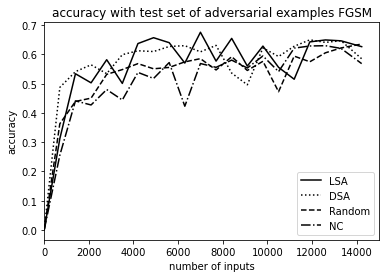

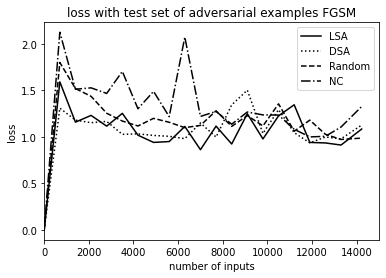

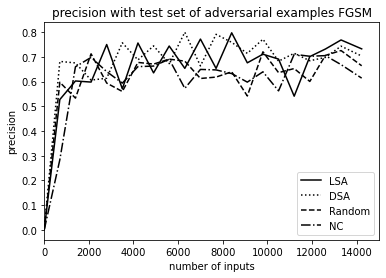

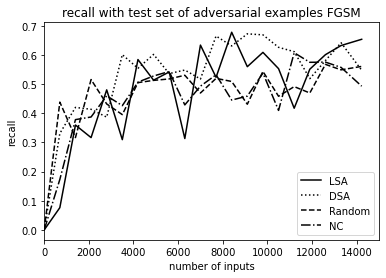

In [43]:
#configuration 1
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#metric = "accuracy" # accuracy loss
my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_0[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_0[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_0[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_0[metric],colors[3],linestyle=linestyles[3])


    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with test set of adversarial examples FGSM")
    plt.xlim([0, 15000])
    #plt.ylim([0, 1])
    plt.xlabel('number of inputs')
    plt.ylabel(metric)
    plt.savefig("intel_c1_"+metric + "_0.svg")

    plt.show()


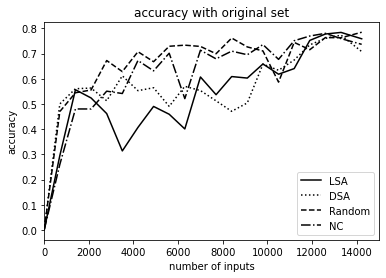

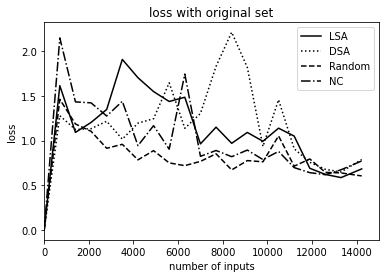

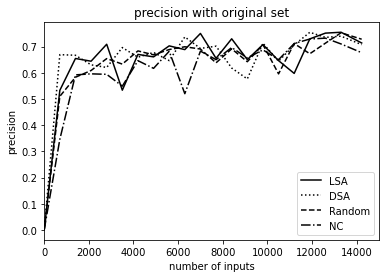

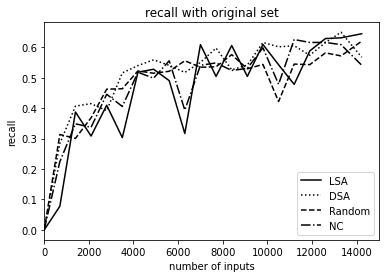

In [44]:
#configuration 1
#metric = "accuracy" # accuracy loss
my_metrics =["accuracy","loss","precision","recall"]

for metric in my_metrics:
    plt.clf()
    plt.plot(n_inputs,df_evaluate_lsa_1[metric],colors[0],linestyle=linestyles[0])
    plt.plot(n_inputs,df_evaluate_dsa_1[metric],colors[1],linestyle=linestyles[1])
    plt.plot(n_inputs,df_evaluate_random_1[metric],colors[2],linestyle=linestyles[2])
    plt.plot(n_inputs,df_evaluate_nc_1[metric],colors[3],linestyle=linestyles[3])

    legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



    plt.legend(handles=legend_elements)#
    plt.title(metric + " with original set")
    plt.xlim([0, 15000])
    #plt.ylim([0, 1])
    plt.xlabel('number of inputs')
    plt.ylabel(metric)
    plt.savefig("intel_c1_"+metric + "_1.svg")

    plt.show()


13300 0.715499997138977
13300 0.7101666629314423
14224 0.7103333473205566
12600 0.7053333222866058


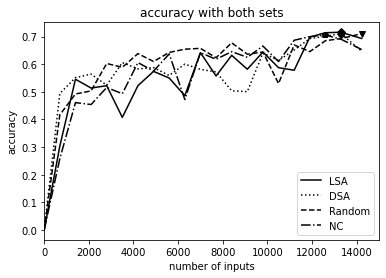

In [46]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.plot(n_inputs,accuracy_c1_lsa_3,colors[0],linestyle=linestyles[0])
plt.plot(n_inputs,accuracy_c1_dsa_3,colors[1],linestyle=linestyles[1])
plt.plot(n_inputs,accuracy_c1_random_3,colors[2],linestyle=linestyles[2])
plt.plot(n_inputs,accuracy_c1_nc_3,colors[3],linestyle=linestyles[3])


legend_elements = [Line2D([0], [0], color='k', label='LSA',ls = linestyles[0]),
                   Line2D([0], [0], color='k', label='DSA',ls = linestyles[1]),
                   Line2D([0], [0], color='k', label='Random',ls = linestyles[2]),
                   Line2D([0], [0], color='k', label='NC',ls = linestyles[3])]



plt.legend(handles=legend_elements)#


plt.title("accuracy with both sets")


print(n_inputs[np.argmax(accuracy_c1_lsa_3)],accuracy_c1_lsa_3.max())
print(n_inputs[np.argmax(accuracy_c1_dsa_3)],accuracy_c1_dsa_3.max())
print(n_inputs[np.argmax(accuracy_c1_random_3)],accuracy_c1_random_3.max())
print(n_inputs[np.argmax(accuracy_c1_nc_3)],accuracy_c1_nc_3.max())

plt.plot(n_inputs[np.argmax(accuracy_c1_lsa_3)],accuracy_c1_lsa_3.max(),'-kD')
plt.plot(n_inputs[np.argmax(accuracy_c1_dsa_3)],accuracy_c1_dsa_3.max(),'-ko')
plt.plot(n_inputs[np.argmax(accuracy_c1_random_3)],accuracy_c1_random_3.max(),'-kv')
plt.plot(n_inputs[np.argmax(accuracy_c1_nc_3)],accuracy_c1_nc_3.max(),'-kp')

plt.xlabel('number of inputs')
plt.ylabel('accuracy')
plt.xlim([0, 15000])
#plt.ylim([0, 1])
plt.savefig("intel_c1_"+"accuracy" + "_both.svg")

plt.show()

## saving

In [15]:
new_model_lsa_dir = "D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2"

i=0
for model in models_lsa:
    model.save(new_model_lsa_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_lsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/int

In [16]:
new_model_dsa_dir = "D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2"

i=0
for model in models_dsa:
    model.save(new_model_dsa_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_dsa_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/int

In [17]:
new_model_random_dir = "D:/models/intel_models/C1/intel_model_c1_sep_random_e2"

i=0
for model in models_random:
    model.save(new_model_random_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_random_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/mo

In [18]:
new_model_nc_dir = "D:/models/intel_models/C1/intel_model_c1_sep_nc_e2"

i=0
for model in models_nc:
    model.save(new_model_nc_dir+"_"+str(i))
    i+=1

INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_0\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_1\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_2\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_3\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_4\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_5\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_6\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model_c1_sep_nc_e2_7\assets
Model has been saved
INFO:tensorflow:Assets written to: D:/models/intel_models/C1/intel_model